# Introduction

by Arvin Assanny

### Dataset Description

This data contains about information of customers churn.

Here we make explain our columns meaning.

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |


### Problem

Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

## Import Libraries

We will import libraries which we will use on completing this assignment

In [1]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

#Importing our Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Importing our Train and Test split
from sklearn.model_selection import train_test_split

#For removing outliers
from feature_engine.outliers import Winsorizer

#For preprocessing purposes 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#For evaluation purposes
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

#For deployment purposes
import pickle

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# For showing our time
import time

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting random seed so our trained data result stays consistent
np.random.seed(50)
tf.random.set_seed(50)


## Data Loading
We load our data in .csv format using pandas

In [2]:
df = pd.read_csv('churn.csv')
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [3]:
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Here we showed ten first and ten last row of our data.

### Check Dataset

We want to take a look at our data, so we can see some overview.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

We can see that we have some missing values, and also we have 22 columns and 37010 rows in our data set

In [5]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Here we can see in more detail about our missing value

In [6]:
df.duplicated().sum()

18

We also have some duplicated data, which we will drop.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

Now we dont have any duplicated data.

In [9]:
#checking other common missing values
miss = {}

for i in list(df.columns):
    miss[i] = 0
    for a in df[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'user_id': 0,
 'age': 0,
 'gender': 0,
 'region_category': 0,
 'membership_category': 0,
 'joining_date': 0,
 'joined_through_referral': 0,
 'preferred_offer_types': 0,
 'medium_of_operation': 0,
 'internet_option': 0,
 'last_visit_time': 0,
 'days_since_last_login': 0,
 'avg_time_spent': 0,
 'avg_transaction_value': 0,
 'avg_frequency_login_days': 0,
 'points_in_wallet': 0,
 'used_special_discount': 0,
 'offer_application_preference': 0,
 'past_complaint': 0,
 'complaint_status': 0,
 'feedback': 0,
 'churn_risk_score': 0}

Here we want to check whether we have another uncommon missing value, and turns out we don't have any which is good.

### Data Describe

We want to see our data in general view, using describe we can see cetral tendency from our numerical and categorical data.

In [10]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36992.0,279.147450,329.947709,0.00,60.1025,161.765,356.5150,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.46,14177.5400,27554.485,40855.1100,99914.050000
avg_frequency_login_days,36992.0,14.658617,9.479184,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36992.0,623.562421,270.263994,0.00,574.1350,680.370,757.0025,2069.069761
churn_risk_score,36992.0,0.540982,0.498324,0.00,0.0000,1.000,1.0000,1.000000


Here we know that we have negative value in `days_since_last_login` column, which we have to deal with later on.

In [11]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
user_id,36992,36992,9f420209e7d129f3,1
gender,36933,2,F,18490
region_category,31564,3,Town,14128
membership_category,36992,6,Basic Membership,7724
joining_date,36992,1096,2015-06-02,55
joined_through_referral,31554,2,No,15839
preferred_offer_types,36704,3,Gift Vouchers/Coupons,12349
medium_of_operation,31599,3,Desktop,13913
internet_option,36992,3,Wi-Fi,12413
last_visit_time,36992,30101,07:56:41,6


We also have some categorical columns with high unique value, such as `user_id`, `joining_date`, and `last_visit_time`. In this case, we might want to drop it since this kind of data is not good for our models.

### Data Cleaning
After doing some overview with our data set, we will try do some basic data cleaning.

In [12]:
df_cleaned = df.drop(columns=['last_visit_time', 'user_id', 'joining_date'],axis=1)

Here we drop columns with high unique values.

In [13]:
df_cleaned['days_since_last_login'] = df_cleaned['days_since_last_login'].apply(lambda x: x if x >= 0 else np.nan)

We also opt to using np.nan to impute the negative value in `days_since_last_login` column, which we will handle later on.

In [14]:
num_cols = df_cleaned.select_dtypes(["int", "float"])
num_cols

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,29,4.0,1184.490000,38604.69,10.0,627.48,1
1,50,11.0,338.150000,7665.66,17.0,575.97,1
2,26,8.0,235.140000,37671.69,5.0,767.93,0
3,63,10.0,56.670000,15678.14,11.0,590.22,1
4,64,9.0,153.990000,8422.68,0.0,722.04,0
...,...,...,...,...,...,...,...
37005,36,15.0,199.330000,29455.29,9.0,846.52,0
37006,27,15.0,368.500000,27038.47,8.0,835.98,0
37007,20,13.0,272.130000,39305.35,27.0,714.90,0
37008,38,NaN,65.070000,46108.73,6.0,744.99,0


In [15]:
cat_cols = df_cleaned.select_dtypes(["category", "object"]).columns.tolist()

Here we assign some variable for EDA purposes.

## Exploratory Data Analysis
Now we want to explore about our data which may provide insights about the data.

### Target Variable Analysis

We use churn_risk_score as our target variable

In [16]:
print(f'Number of unique values in default column: {df.churn_risk_score.nunique()}')
print(f'Unique values in default column: {df.churn_risk_score.unique()}')

Number of unique values in default column: 2
Unique values in default column: [1 0]


As we already know, we only have 2 unique values in our target.

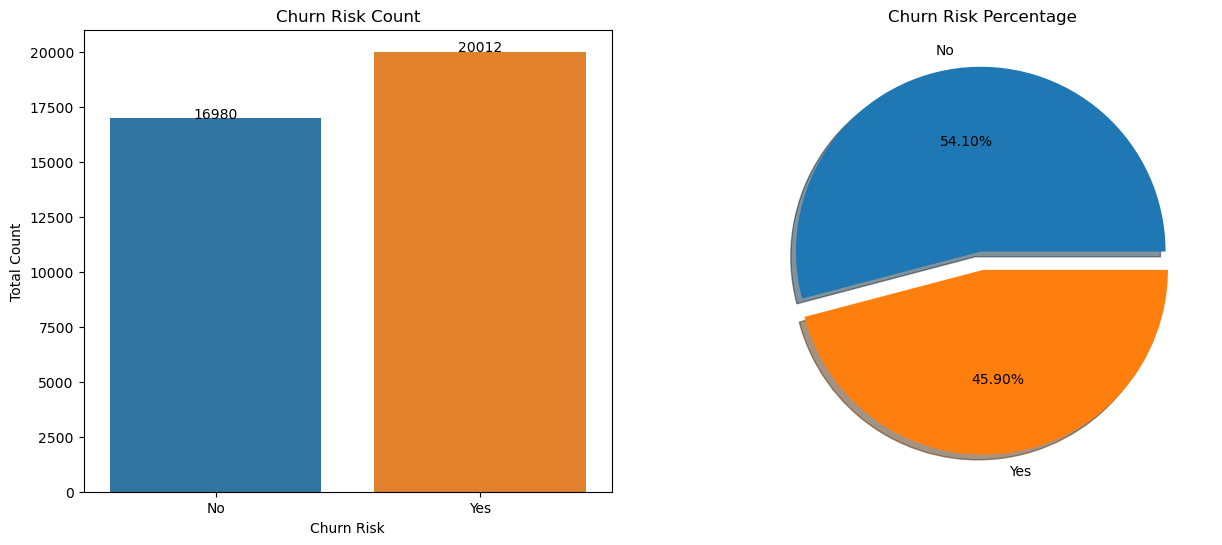

In [17]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='churn_risk_score', data=df_cleaned)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Churn Risk Count')
fig.set_xticklabels(['No','Yes'])
plt.xlabel('Churn Risk')
plt.ylabel('Total Count')
plt.subplot(1, 2, 2)
plt.pie(df_cleaned['churn_risk_score'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%', explode=[0.05, 0.05], shadow=True)
plt.title('Churn Risk Percentage')
plt.show()

We can say our dataset is quite balanced, so when our model try to learn the pattern the data provides a balanced target variable so we don't need to do any handling.

### Categorical Data Analysis
We want to explore our data in a single column and compared it with with the churn score to gain some insights.

<Figure size 1800x800 with 0 Axes>

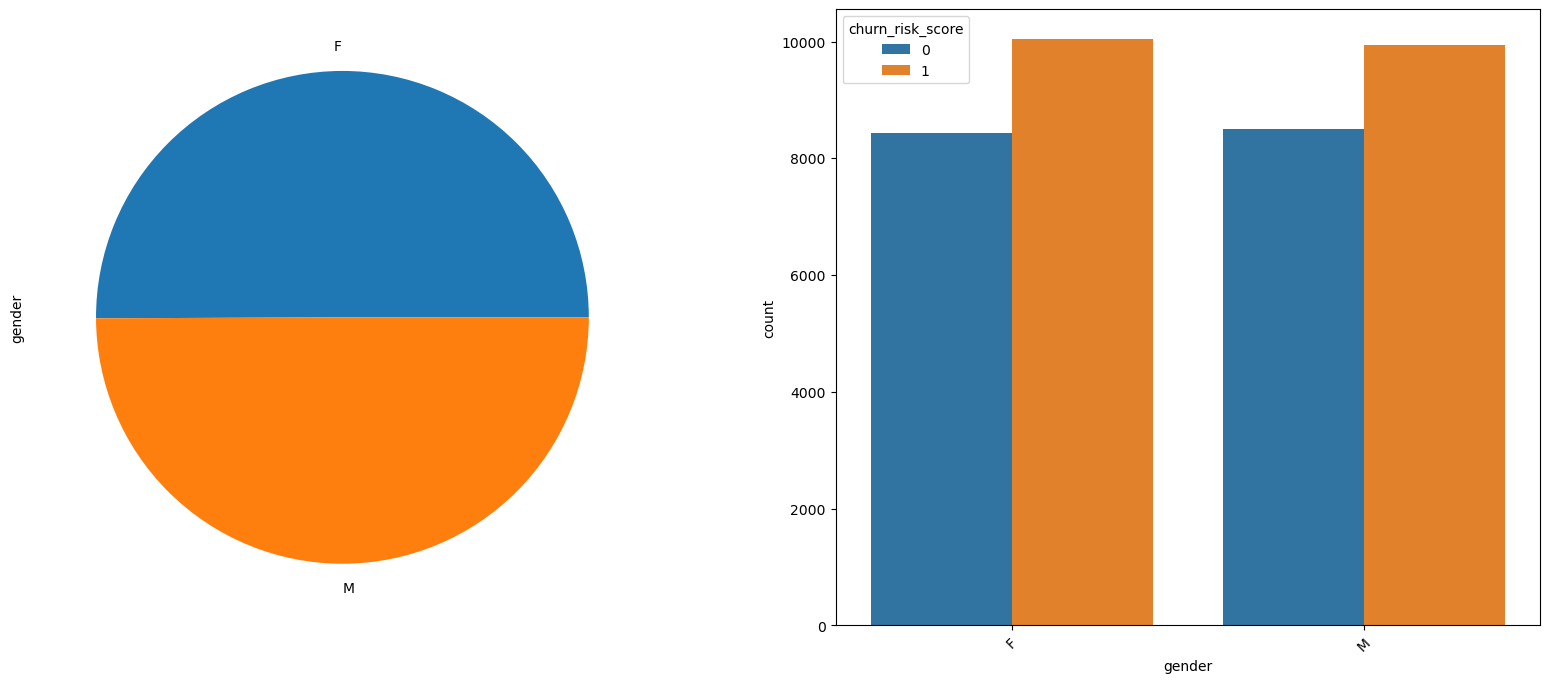

<Figure size 1800x800 with 0 Axes>

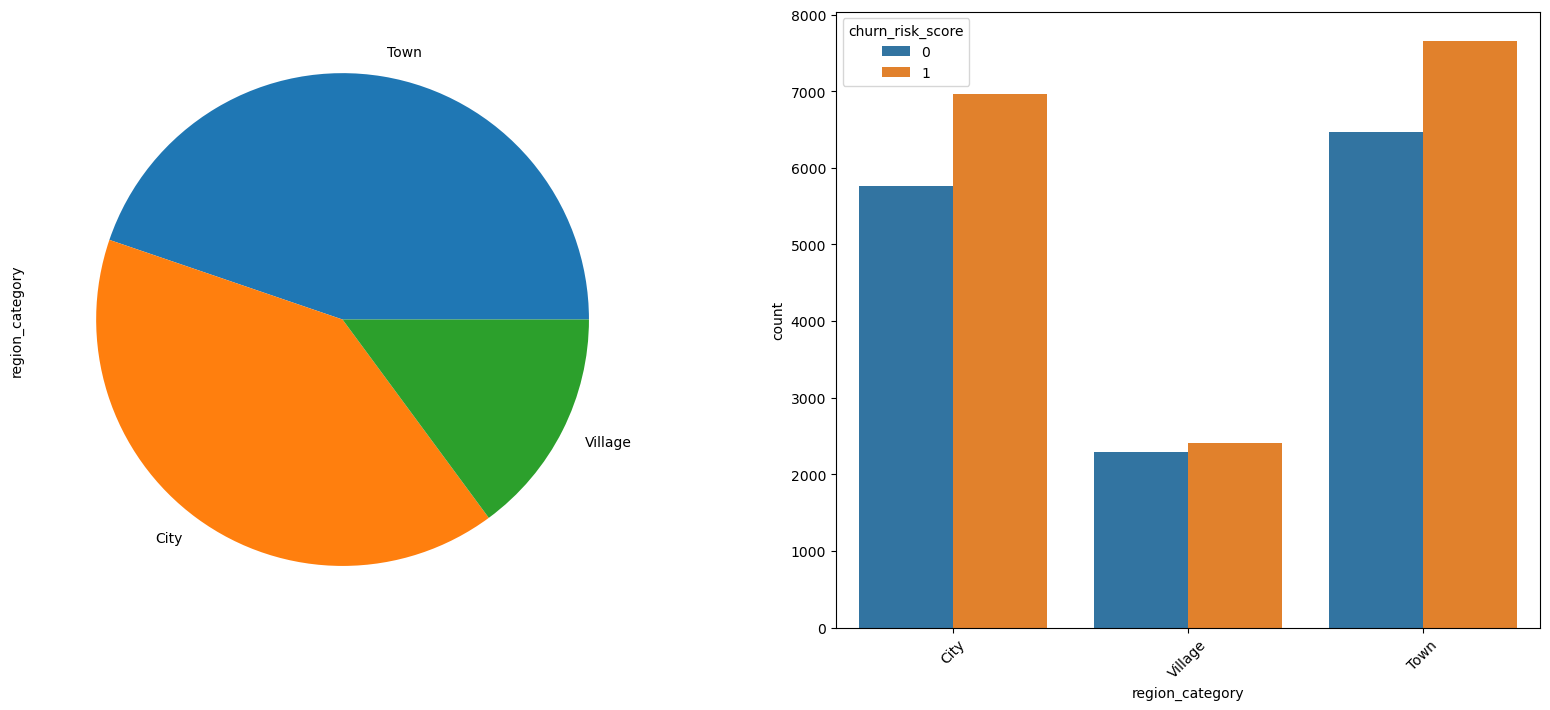

<Figure size 1800x800 with 0 Axes>

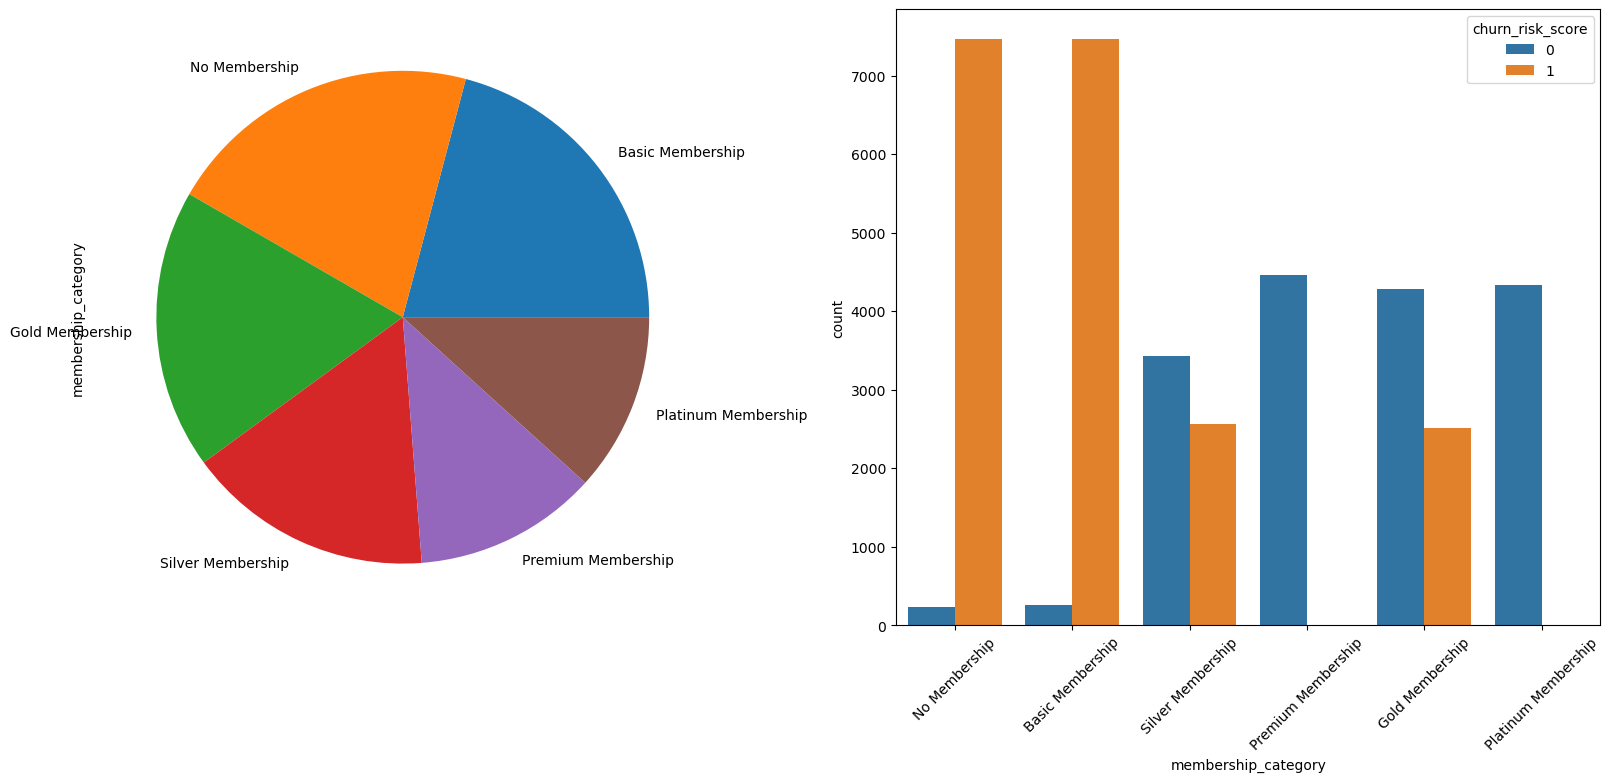

<Figure size 1800x800 with 0 Axes>

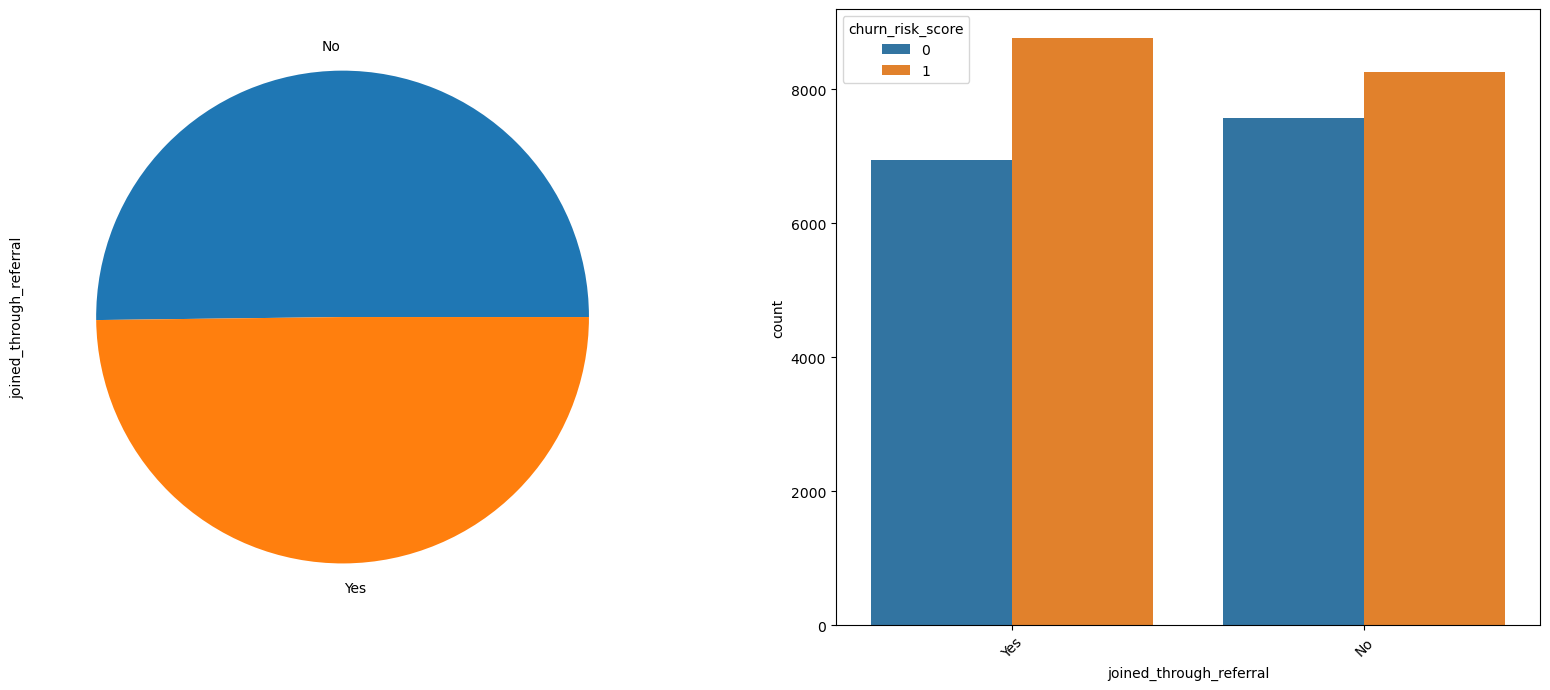

<Figure size 1800x800 with 0 Axes>

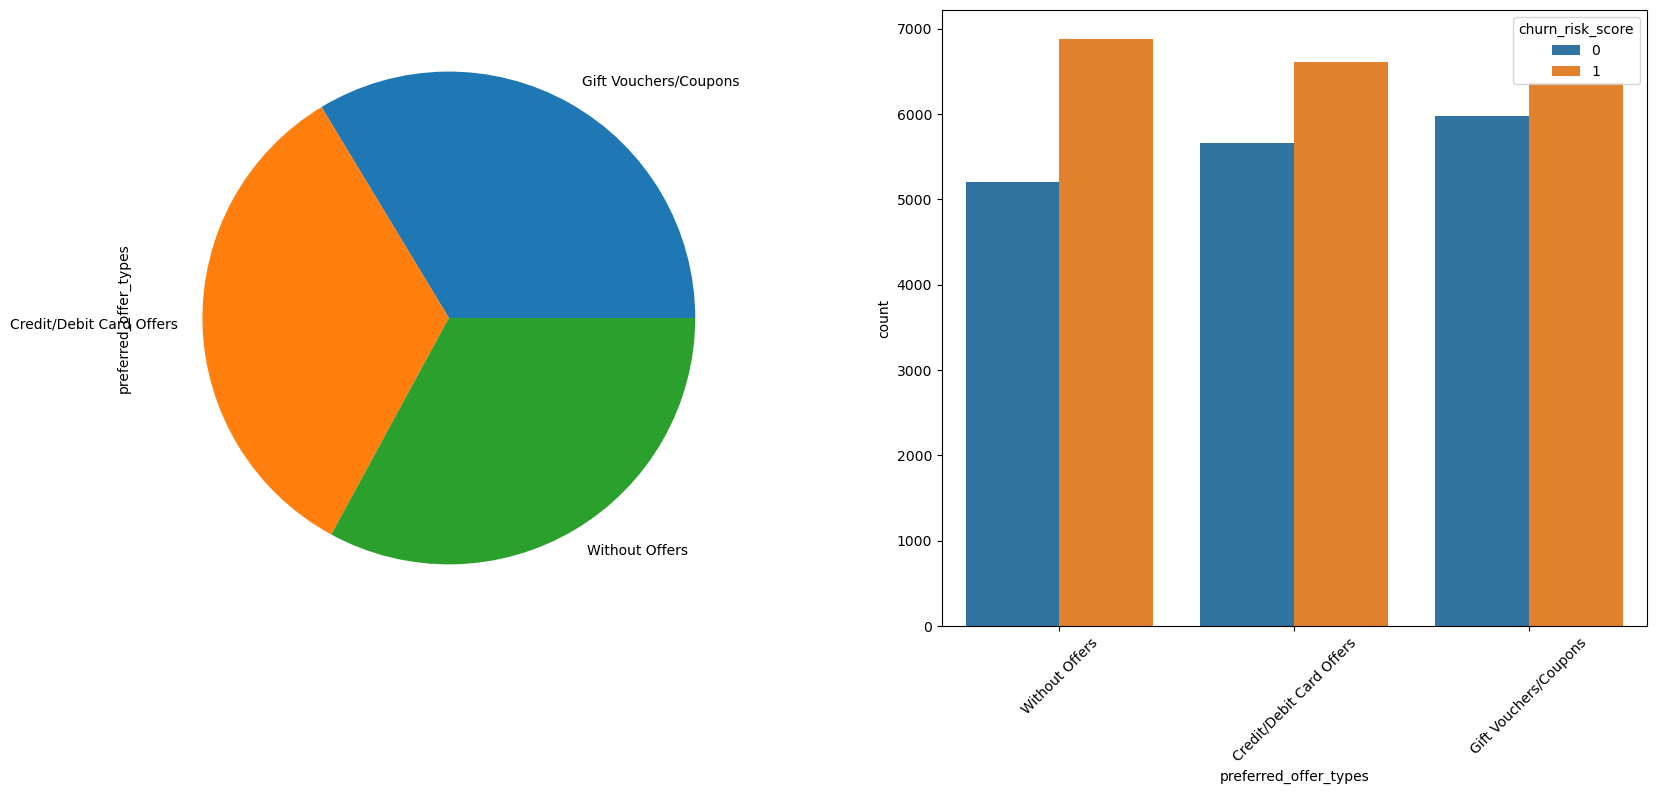

<Figure size 1800x800 with 0 Axes>

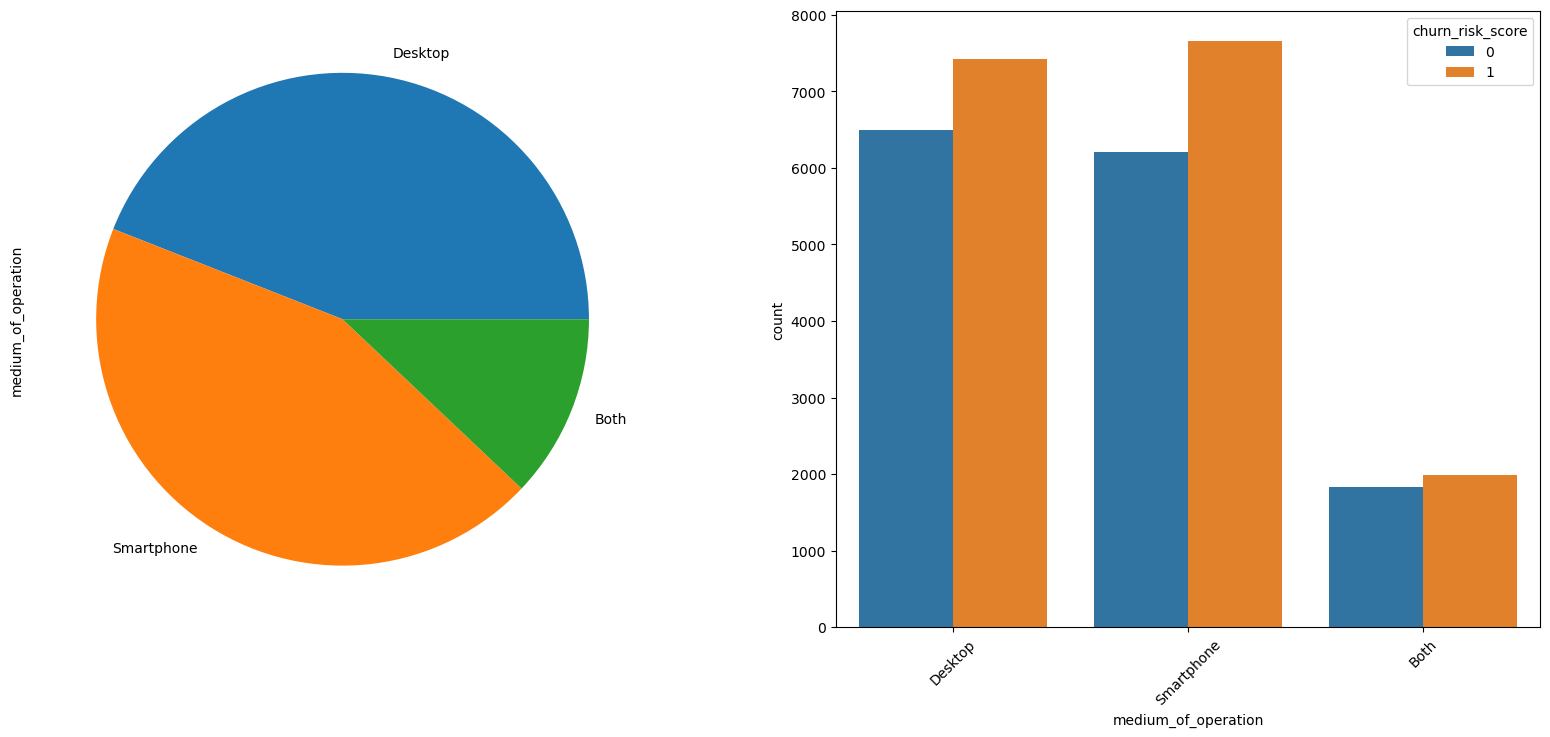

<Figure size 1800x800 with 0 Axes>

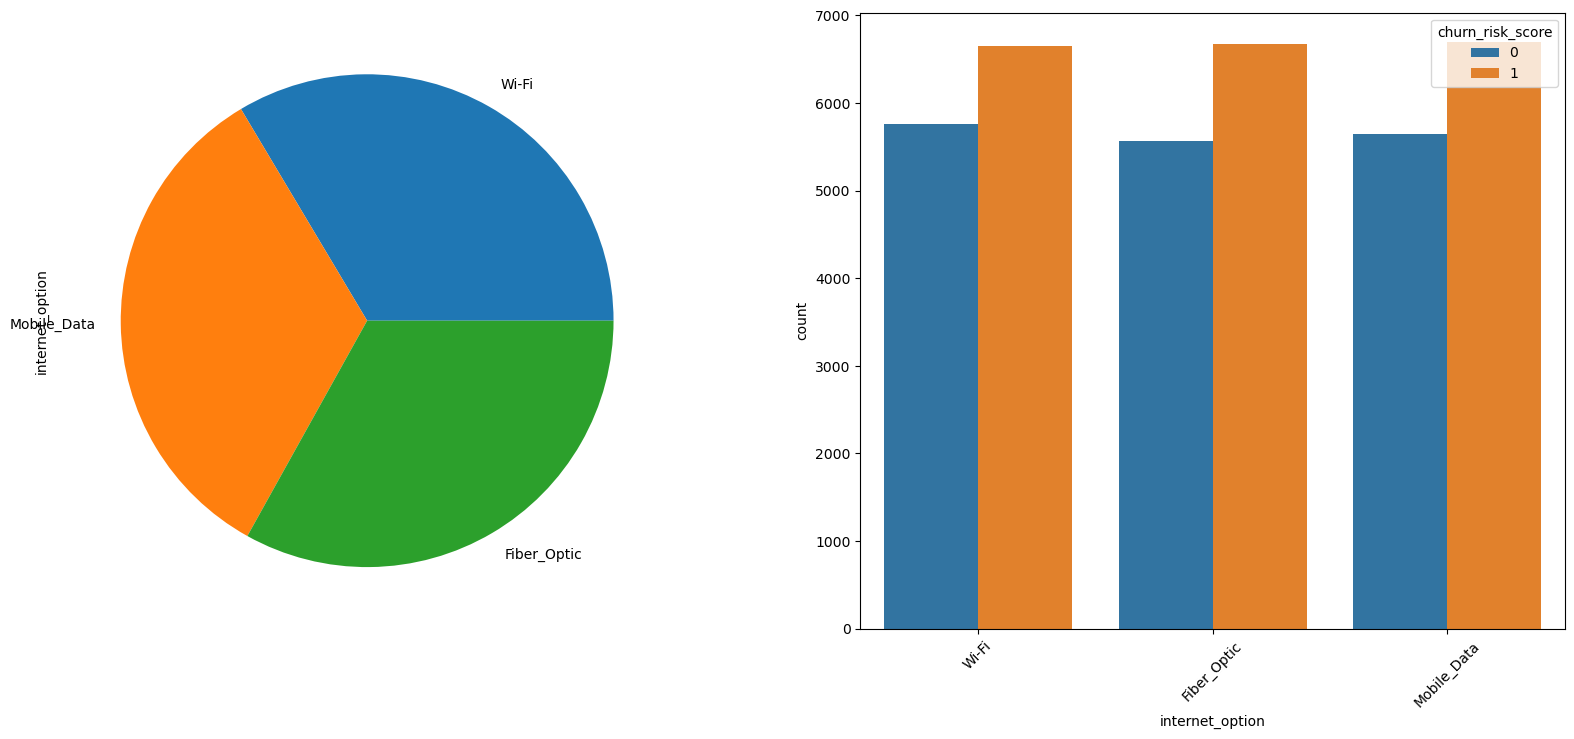

<Figure size 1800x800 with 0 Axes>

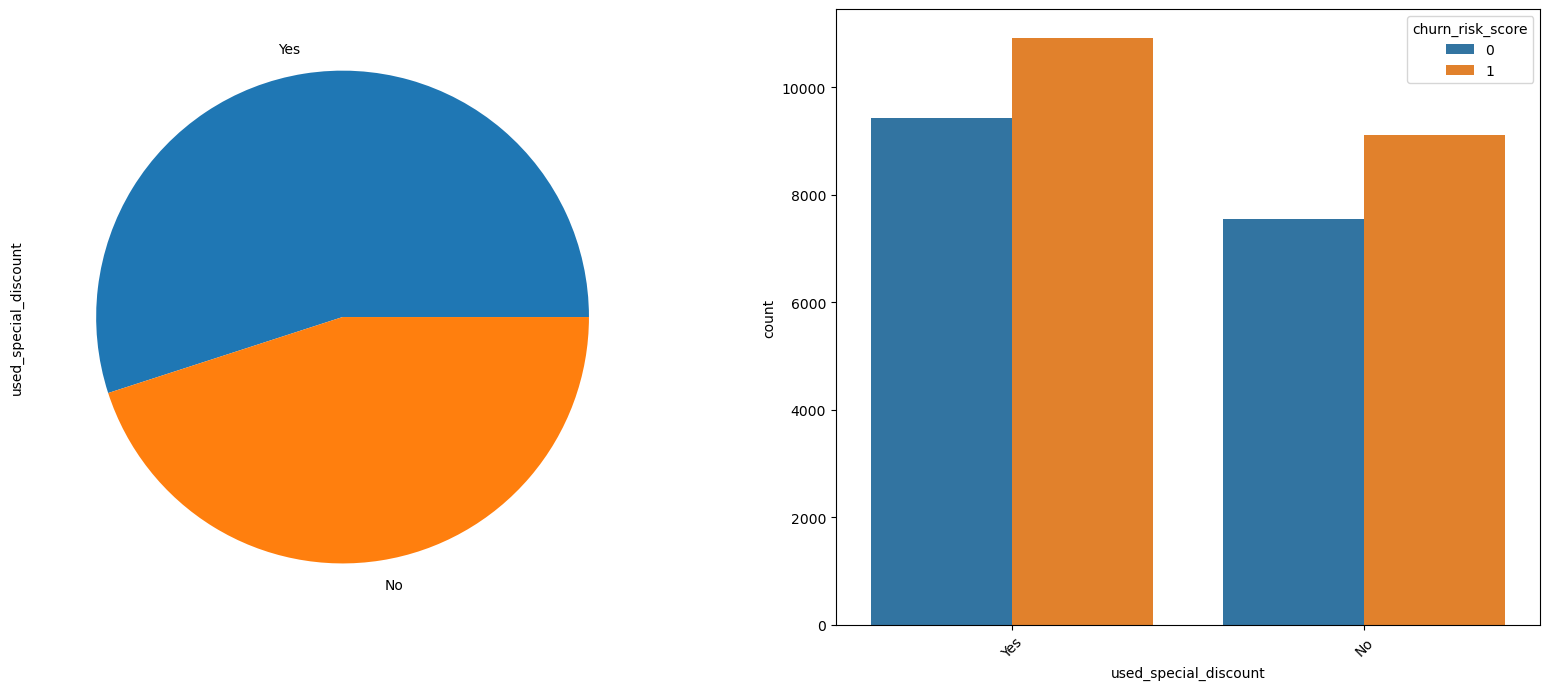

<Figure size 1800x800 with 0 Axes>

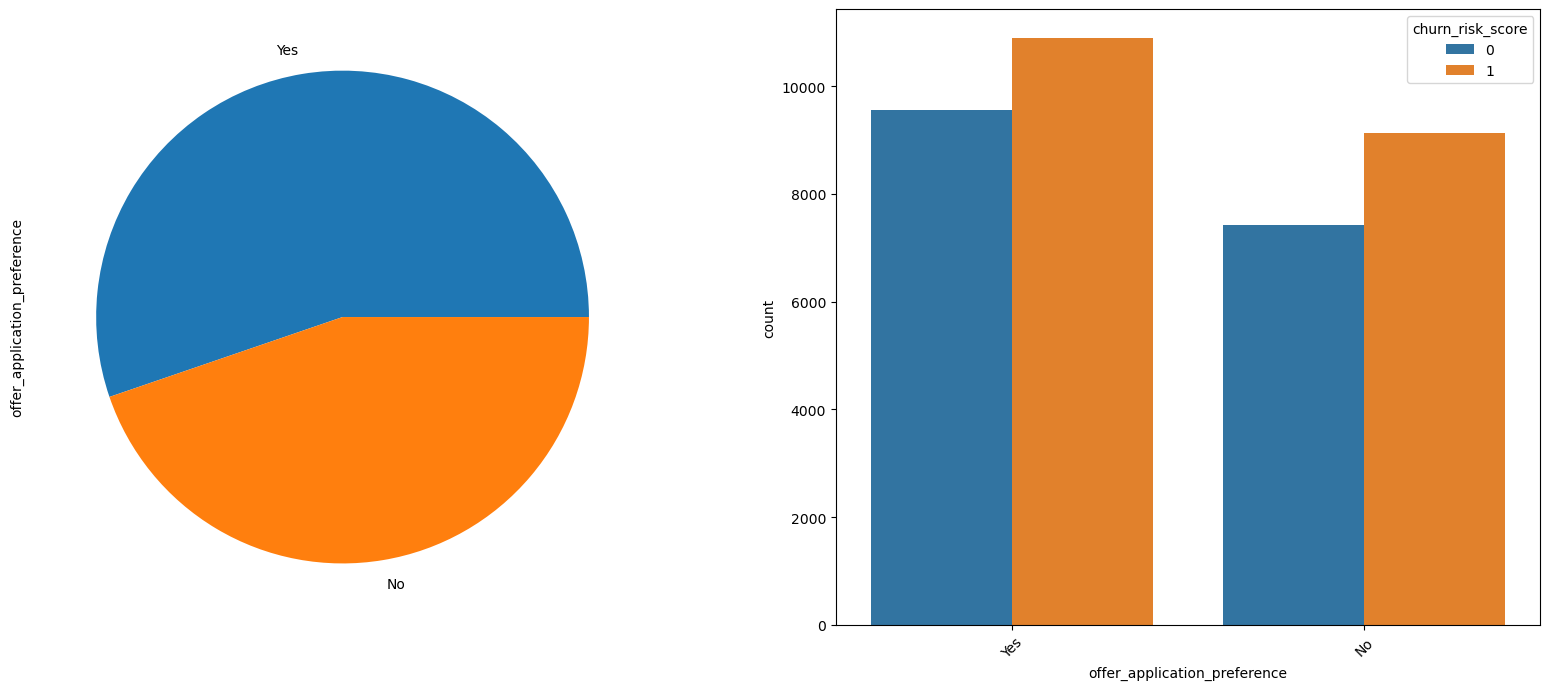

<Figure size 1800x800 with 0 Axes>

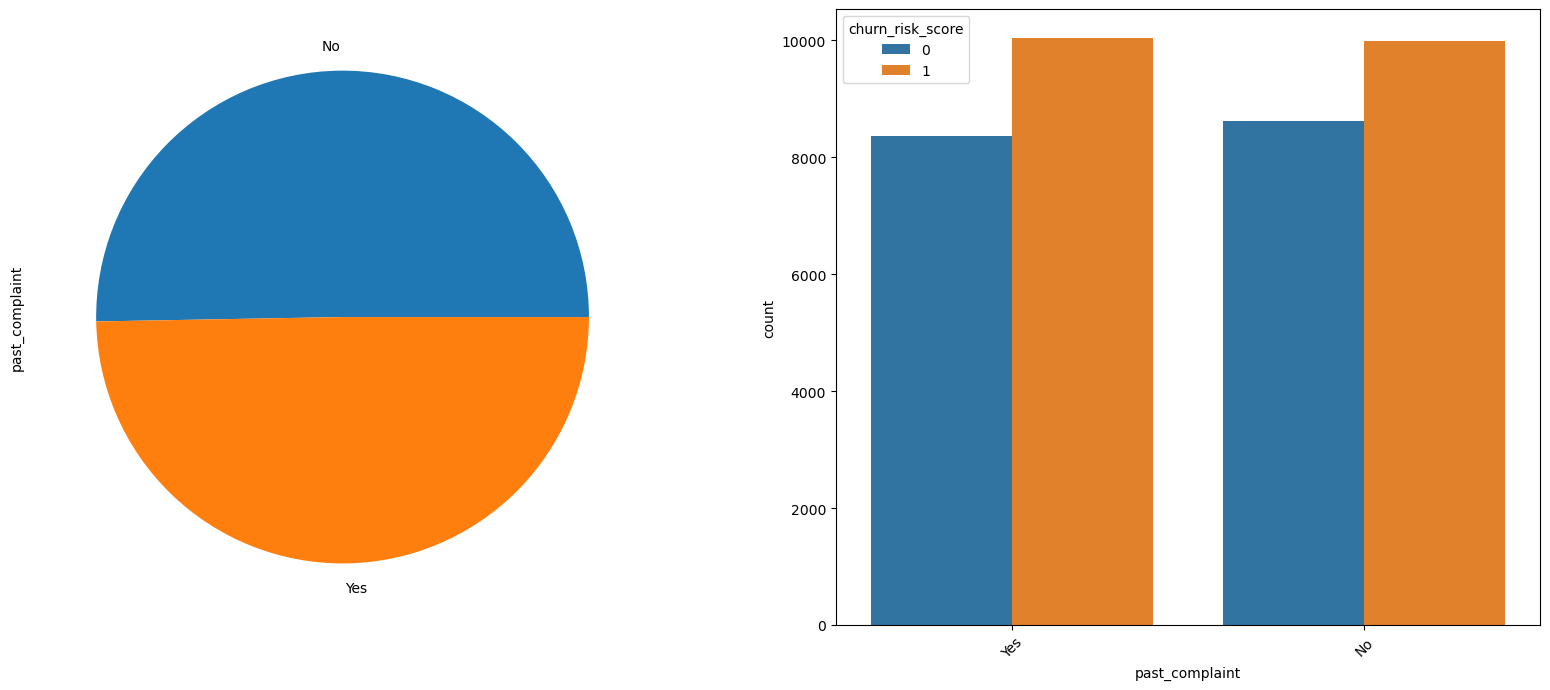

<Figure size 1800x800 with 0 Axes>

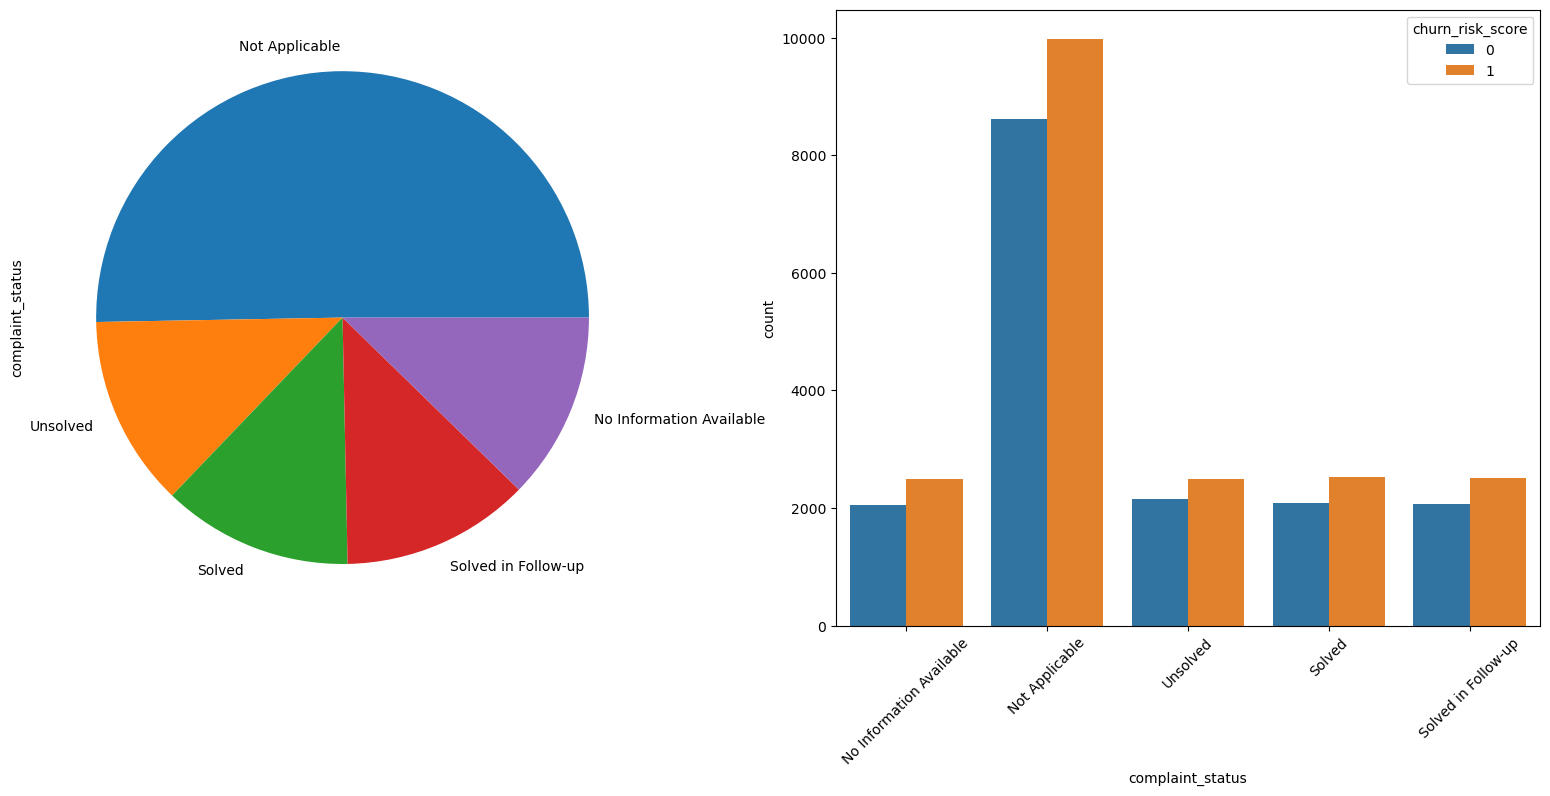

<Figure size 1800x800 with 0 Axes>

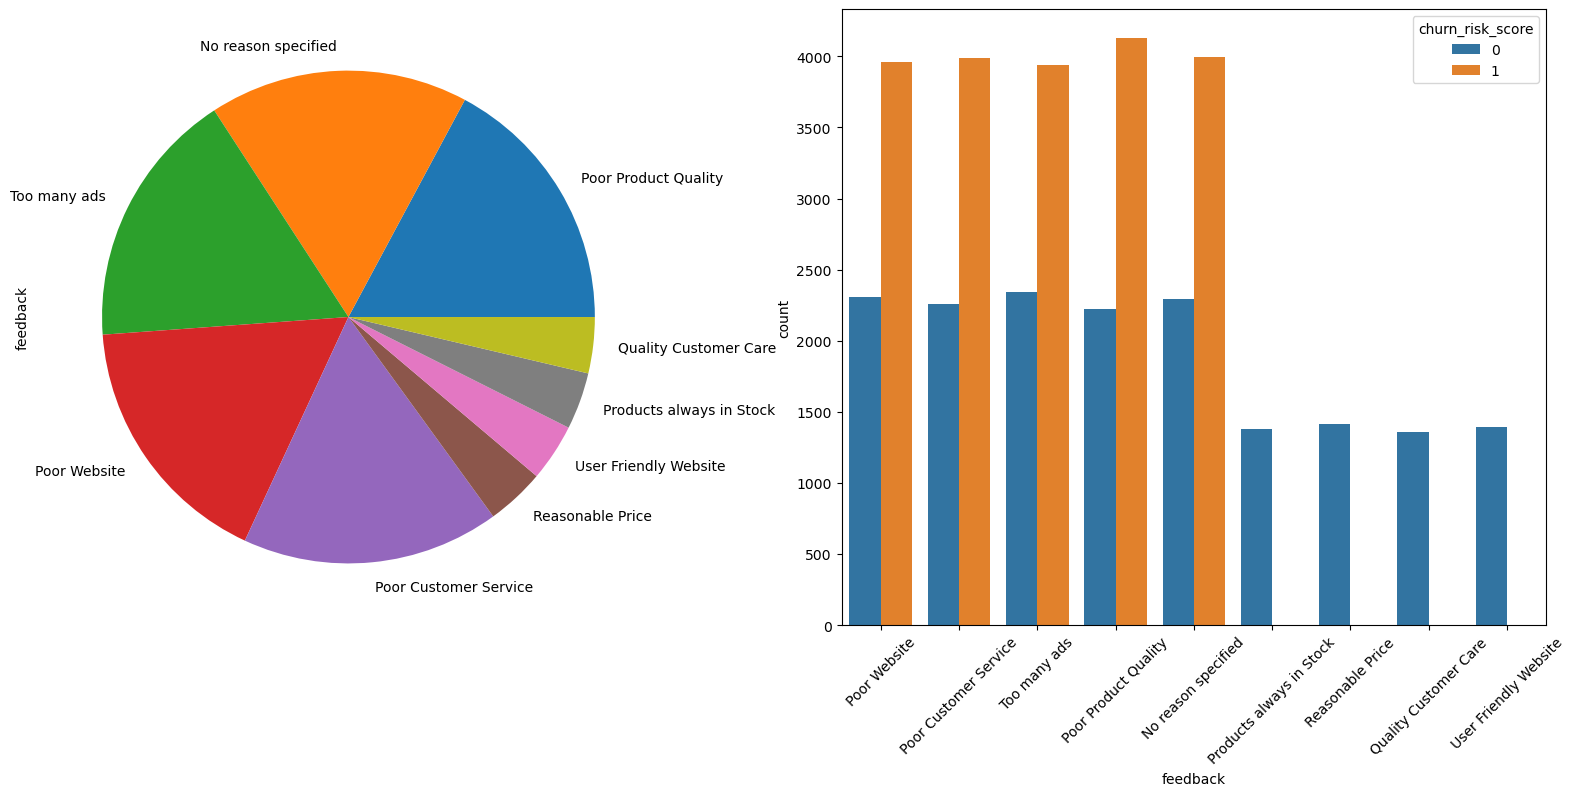

In [18]:
for col in cat_cols:
  plt.figure(figsize=(18,8))
  fig, axes = plt.subplots(ncols=2,figsize=(20,8))
  df_cleaned[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'churn_risk_score', data = df_cleaned)
  plt.xticks(rotation=45)

From this chart we can see that:
* membership_category has a big relation with churn rate in ur customer, where the highest tier of membership tends to not churn with our services and the customer with no membership or low tier membership has higher tendency to churn. This is makes sense, since people with membership means they already use our services for long time and repeatedly so they may churn less.
* feedback also shows a relationship with churn rate, where people with good feedback will tend to not churn, and people with bad feedback tends to churn more. This is also makes sense because, when customer feel that the service is good they will keep using it and when it is bad they will stop using it.
* For another categorical columns we dont really see any high relationship.

### Numerical Data Analysis

We want to see our numerical data whether it has any insight or not.

In [19]:
num_cols = num_cols.drop(['churn_risk_score'], axis = 1).columns.tolist()
num_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

here we define variable to help us in EDA with our numerical column.

#### Last login vs Transaction value

<AxesSubplot:xlabel='days_since_last_login', ylabel='avg_transaction_value'>

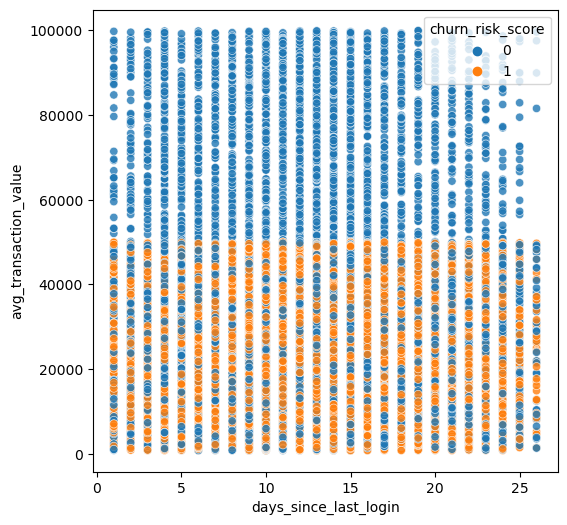

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_cleaned, x='days_since_last_login', y='avg_transaction_value', hue='churn_risk_score', alpha=0.8)

We see that customer who churn and not churn doesn't show us clear picture from days since last login. But we know that people with higher transaction value tends to not churn.

#### Login Frequency vs Transaction Value

<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='avg_transaction_value'>

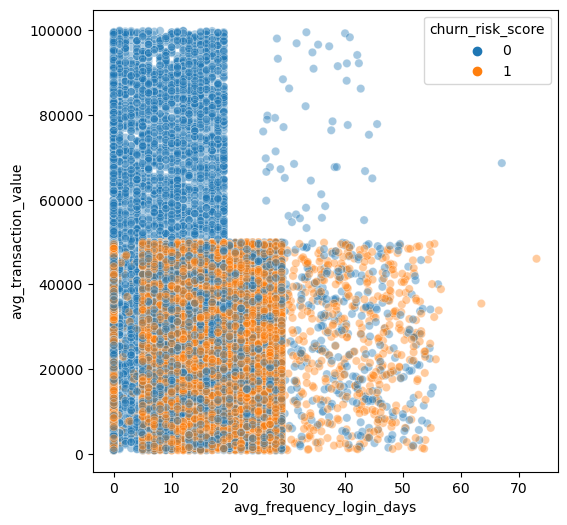

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_cleaned, x='avg_frequency_login_days', y='avg_transaction_value', hue='churn_risk_score', alpha=0.4)

We can see here that people who not churn are the one who use our services more frequently than those who churn.

#### Points vs Transaction Value

<AxesSubplot:xlabel='points_in_wallet', ylabel='avg_transaction_value'>

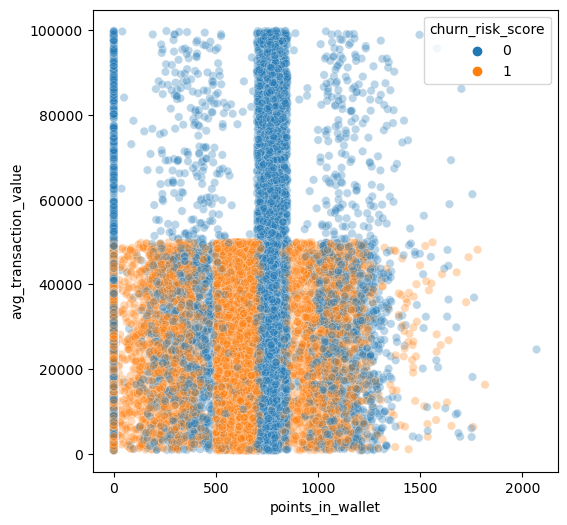

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_cleaned, x='points_in_wallet', y='avg_transaction_value', hue='churn_risk_score', alpha=0.3)

We fail to see any relationship, because it's not clear the patern with people who has high points and not, affects our churn rate.

#### Data distribution

We want to see our data distribution.

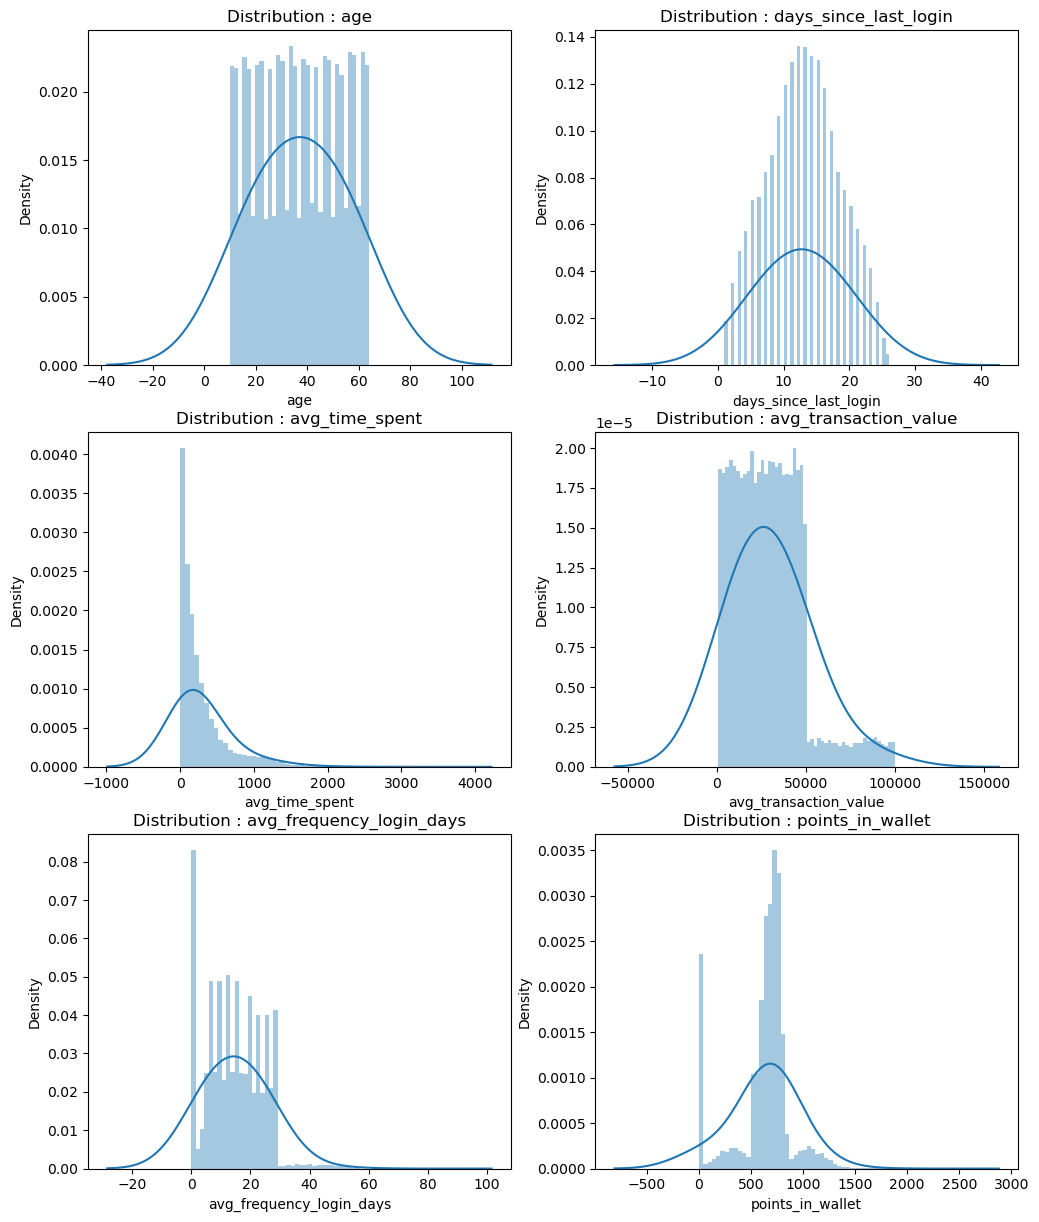

In [23]:
# Numerical Features
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (12,20))
for i in range(len(num_cols)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df_cleaned[num_cols[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + num_cols[i]
    plt.title(title)
plt.show()

We may have some outlier in our data, also some columns have skewed data distribution.

### Check Outlier

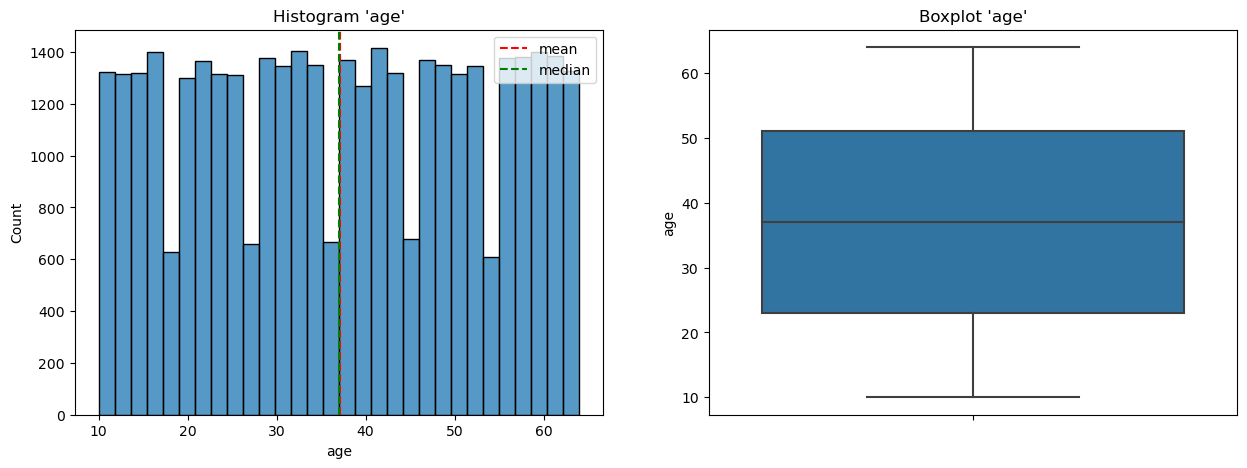

age Kurtosis: -1.1987327113107538
age Skewness: -0.007319319267324801
Columns 'age' Normal Distribution


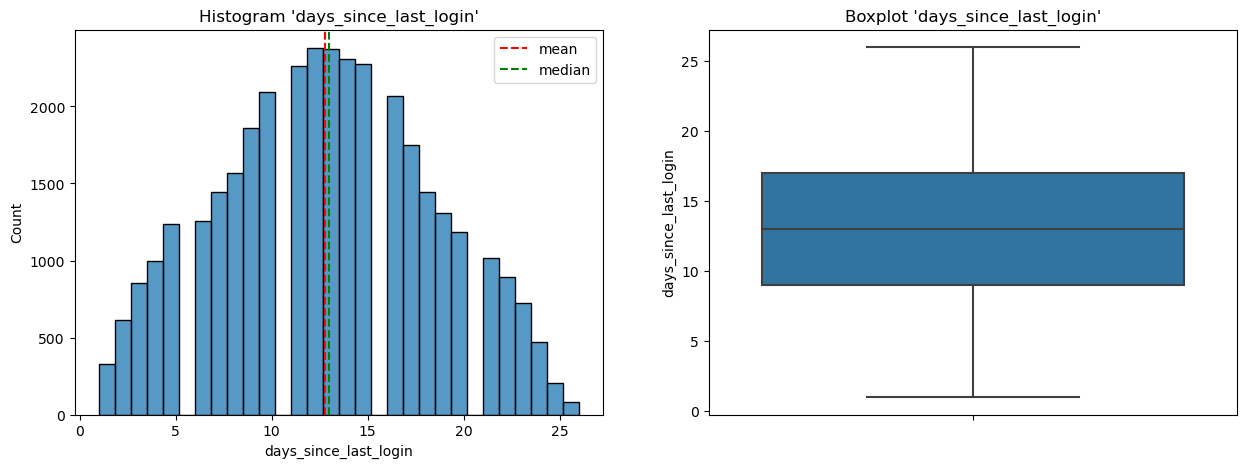

days_since_last_login Kurtosis: -0.6563565402917746
days_since_last_login Skewness: 0.028518603917912035
Columns 'days_since_last_login' Normal Distribution


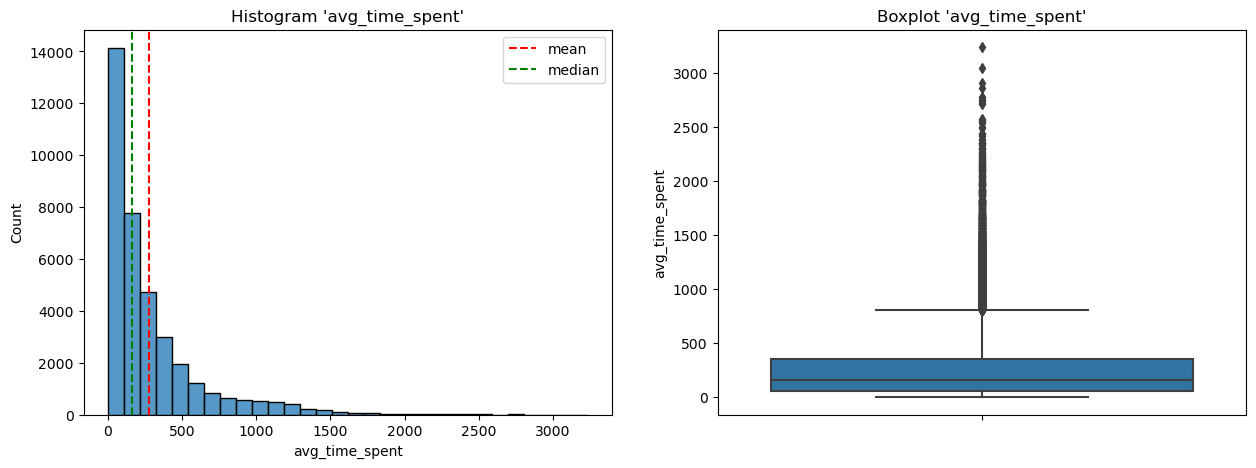

avg_time_spent Kurtosis: 6.503681785862877
avg_time_spent Skewness: 2.2765487001579205
Columns 'avg_time_spent' Right Highly Skewed


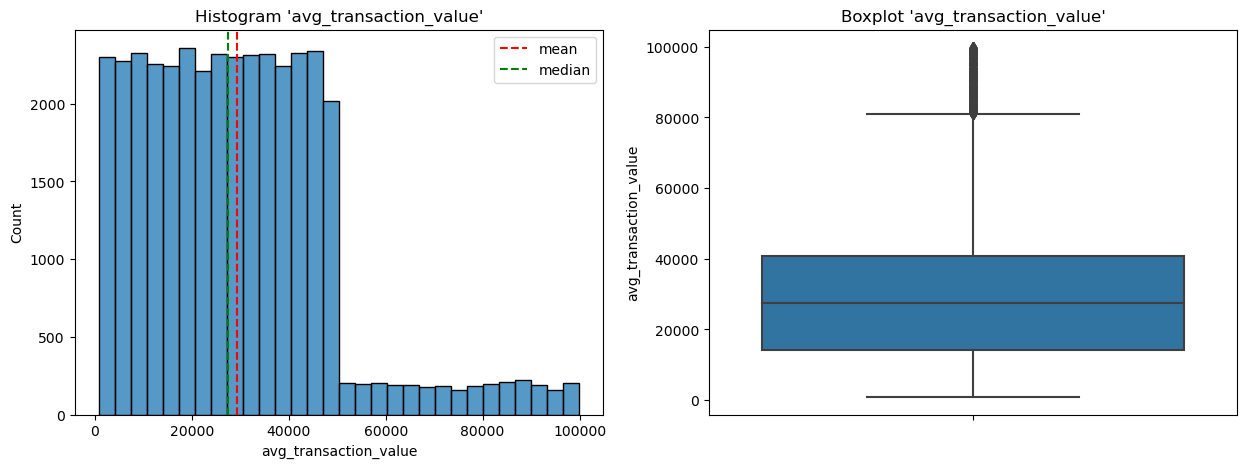

avg_transaction_value Kurtosis: 1.428287011596546
avg_transaction_value Skewness: 1.0110271627457472
Columns 'avg_transaction_value' Right Highly Skewed


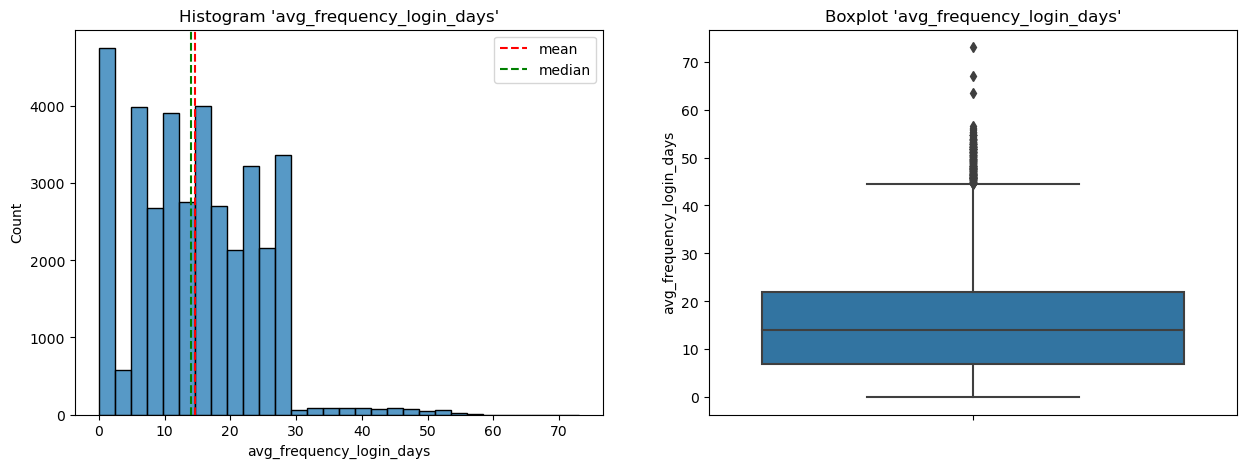

avg_frequency_login_days Kurtosis: 0.26815671188216283
avg_frequency_login_days Skewness: 0.38986070002523915
Columns 'avg_frequency_login_days' Normal Distribution


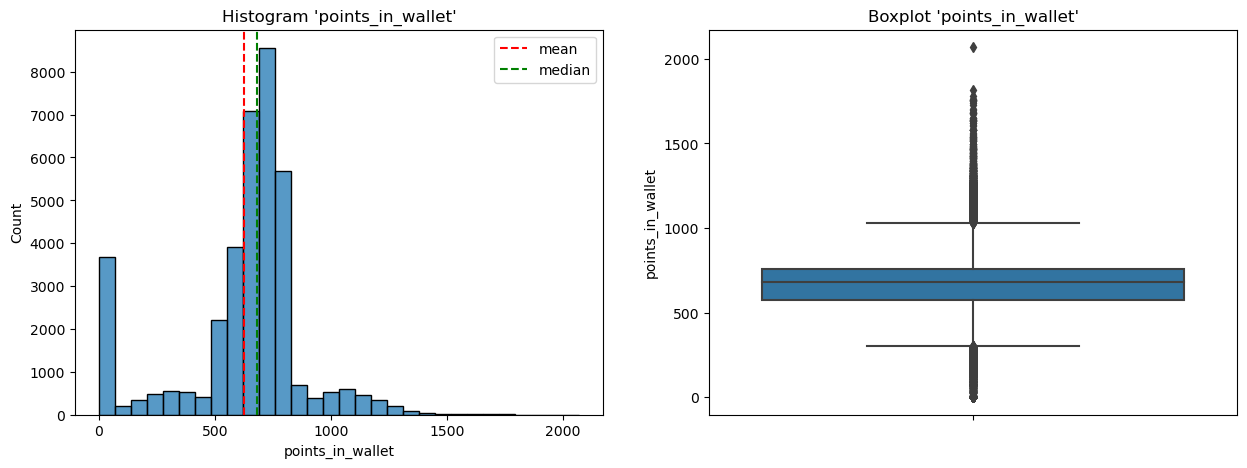

points_in_wallet Kurtosis: 1.3336663397856174
points_in_wallet Skewness: -0.7734917908458531
Columns 'points_in_wallet' Left Moderately Skewed


In [24]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

dnum = df_cleaned[num_cols]

for col in dnum.columns:
    dist(df_cleaned[num_cols], col)

Here we confirmed our earlier guess that some of our data are skewed and have some outliers, this will need some handling later.

### Check Correlation

We do this to help us in selecting the features we will use in our models. Here we split the correlation chart ino numerical and categorical when comparing with our target.

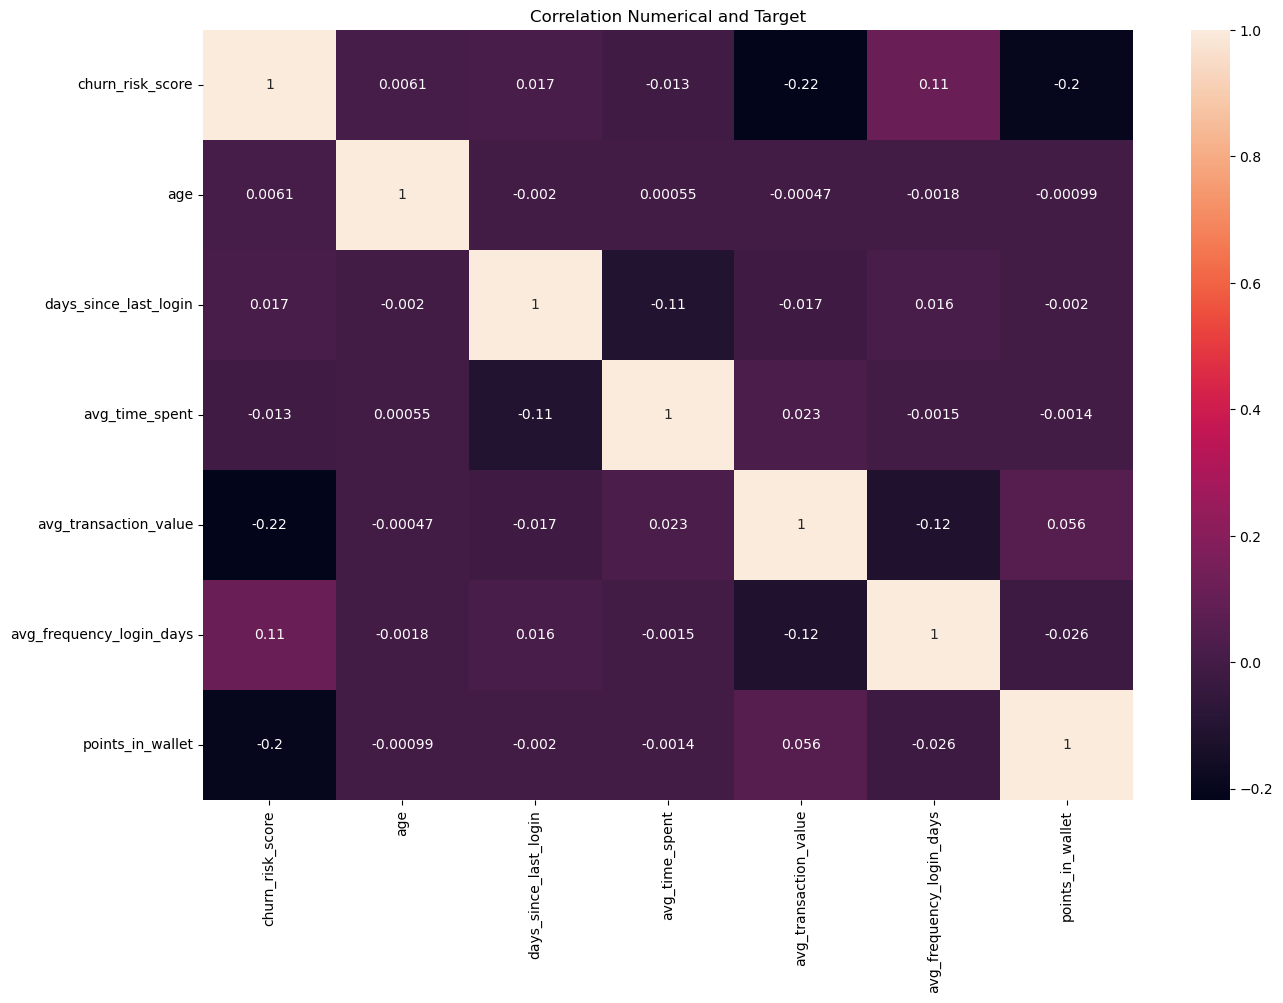

In [25]:
# Correlation between numerical and the target label
num_corr = df_cleaned[['churn_risk_score']+num_cols]
plt.figure(figsize=(15,10))
sns.heatmap(num_corr.corr(),annot=True)
plt.title("Correlation Numerical and Target")
plt.show()

del num_corr

We see that avg_frequency_login_days has the highest positive correlation, and some also has a higher correlation but with negative value.

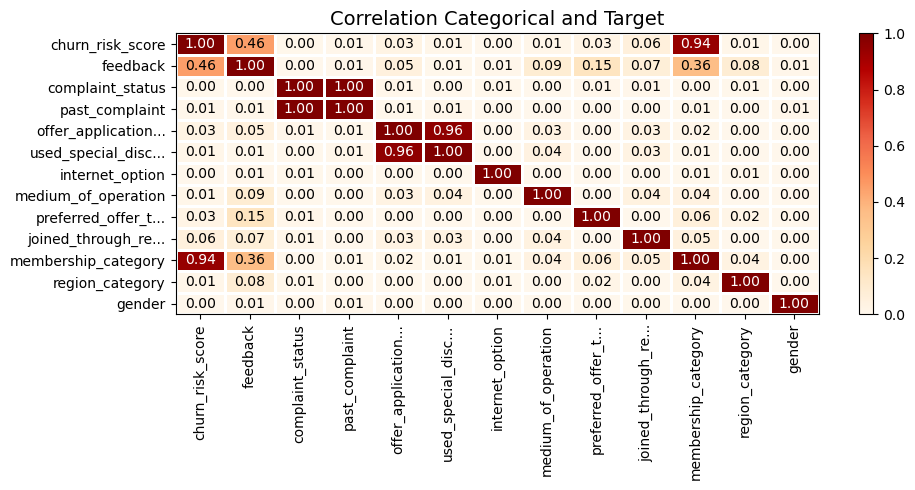

In [26]:
# Categorical and target
df_cat = df_cleaned[cat_cols+['churn_risk_score']]
corr_p = df_cat.phik_matrix(interval_cols='churn_risk_score')

plot_correlation_matrix(corr_p.values, 
                        x_labels=corr_p.columns, 
                        y_labels=corr_p.index, 
                        vmin=0, vmax=1, color_map="OrRd", 
                        title=r"Correlation Categorical and Target", 
                        figsize=(10,5))
plt.show()

As we already know feedback and membership category has the highest correlation.

## Data Preprocessing
Now we will prepare our data to be fit into our model, here we will do some steps to make sure it is ready.

### Cardinality Check

We want to see if our categorical data has some high cardinality issues, which may decrease or model performaces.

In [27]:
categorical = df_cleaned.select_dtypes(["category", "object"]).columns

for i in df_cleaned[categorical]:
    print(f'{i} : {df_cleaned[categorical][i].unique()}')
    print(f'')
    print(f'{i} total unique values : {df_cleaned[categorical][i].nunique()}')
    print('=='*20)

gender : ['F' 'M' nan]

gender total unique values : 2
region_category : [nan 'City' 'Village' 'Town']

region_category total unique values : 3
membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']

membership_category total unique values : 6
joined_through_referral : ['Yes' nan 'No']

joined_through_referral total unique values : 2
preferred_offer_types : ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]

preferred_offer_types total unique values : 3
medium_of_operation : [nan 'Desktop' 'Smartphone' 'Both']

medium_of_operation total unique values : 3
internet_option : ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']

internet_option total unique values : 3
used_special_discount : ['Yes' 'No']

used_special_discount total unique values : 2
offer_application_preference : ['Yes' 'No']

offer_application_preference total unique values : 2
past_complaint : ['Yes' 'No']

past_complaint total

After checking it, we decided to reduce the feedback unique values from 9 into 3. Where we will generalize the feed back into Poor, Netral, Good.

In [28]:
df_cleaned['feedback'] = df_cleaned['feedback'].replace(['Poor Website', 'Poor Customer Service', 'Too many ads', 'Poor Product Quality'], 'Poor')
df_cleaned['feedback'] = df_cleaned['feedback'].replace(['No reason specified'], 'Netral')
df_cleaned['feedback'] = df_cleaned['feedback'].replace(['Products always in Stock', 'Reasonable Price', 'Quality Customer Care', 'User Friendly Website'], 'Good')

In [29]:
df_cleaned['feedback'].value_counts()

Poor      25152
Netral     6290
Good       5550
Name: feedback, dtype: int64

Here we successfully reduce the cardinality in feedback column.

### Handling Missing Values

As we know that our data contains some missing value, in this process we will impute it, with median using our sklearn pipeline which we will define later.

In [30]:
df_cleaned.isnull().sum().sort_values(ascending=False)

joined_through_referral         5438
region_category                 5428
medium_of_operation             5393
days_since_last_login           1999
preferred_offer_types            288
gender                            59
age                                0
used_special_discount              0
feedback                           0
complaint_status                   0
past_complaint                     0
offer_application_preference       0
avg_time_spent                     0
points_in_wallet                   0
avg_frequency_login_days           0
avg_transaction_value              0
internet_option                    0
membership_category                0
churn_risk_score                   0
dtype: int64

We will impute this missing values using simple imputer.

### Feature Selection

But before we go ahead and build our preprocessing pipeline we will reduce the feature only what we will use in our model. Here we using threshold of =>=0.02, but we will also include feature with negative correlation. Beacuse from our EDA section it has some realtionship.

In [31]:
feature = ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
 'days_since_last_login', 'avg_time_spent', 'feedback','membership_category',
  'joined_through_referral', 'offer_application_preference', 'preferred_offer_types']
target = ['churn_risk_score']

In [32]:
# Feature and target split
X = df_cleaned[feature]
y = df_cleaned[target]

Here we declear our feature and target.

## Data Split
Now we will split our data into train,val,test data.

In [33]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify=y, random_state=739
                                                               )

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, 
                                                  train_size=0.8,
                                                  stratify=y_train_full,
                                                  random_state=739)

We also assign new variable for our numerical and categorical feature, to help us in preprocessing step.

In [34]:
num_cols = X[['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'days_since_last_login', 'avg_time_spent']].columns.tolist()
cat_cols = X[['feedback', 'membership_category', 'joined_through_referral', 'offer_application_preference', 'preferred_offer_types']].columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

Number of numerical columns: 5
Numerical columns: ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'days_since_last_login', 'avg_time_spent']
Number of categorical columns: 5
Categorical columns: ['feedback', 'membership_category', 'joined_through_referral', 'offer_application_preference', 'preferred_offer_types']


### Feature Enginering

In this section we will use pipeline to preprocess our data.

In [35]:
num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', StandardScaler())
    ])
cat_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])

# Preprocessing pipeline
preprocessing = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ])

* For numerical feature we use imputer with median, because our data are skewed. We also use capping to handle our outlier, then we proceed to scale them using standard scaler.
* For categorical feature we only impute some missing value then encode it with ordinal encoder. We decided not to use OHE because we want to reduce computing cost by making too much columns.

After it is ready we will transform our dataset.

In [36]:
X_train_tr = preprocessing.fit_transform(X_train)
X_train_tr

array([[ 2.20470084,  0.14701055,  0.65648598, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.47662919,  1.22357327, -0.18778901, ...,  1.        ,
         1.        ,  2.        ],
       [-0.87308247,  1.115917  , -1.8804303 , ...,  0.        ,
         1.        ,  2.        ],
       ...,
       [-0.88855536,  0.79294818, -0.14839417, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85295858,  0.57763564,  2.05470054, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46875176,  0.25466683,  0.72033464, ...,  1.        ,
         1.        ,  0.        ]])

#### `val` data & `test` data transformation

In [37]:
X_val_tr = preprocessing.transform(X_val)
X_val_tr

array([[-0.07912655, -1.5754898 , -1.8804303 , ...,  1.        ,
         1.        ,  1.        ],
       [-1.16025351, -0.49892708, -0.13259324, ...,  0.        ,
         0.        ,  2.        ],
       [-0.04913871,  1.54654209,  0.47214177, ...,  1.        ,
         1.        ,  2.        ],
       ...,
       [ 1.64034345, -0.49892708, -1.8804303 , ...,  1.        ,
         1.        ,  2.        ],
       [-0.22368475,  1.00826073,  0.33165321, ...,  1.        ,
         1.        ,  1.        ],
       [-0.6382643 , -0.06830199,  0.65186394, ...,  1.        ,
         1.        ,  0.        ]])

In [38]:
X_test_tr = preprocessing.transform(X_test)
X_test_tr

array([[-0.12628445,  1.43888582,  0.35820307, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.67252122,  1.33122954,  0.28247683, ...,  1.        ,
         0.        ,  2.        ],
       [-1.13637302,  0.3623231 ,  0.35804184, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.45812327, -1.03720844, -1.8804303 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.85295751, -0.39127081,  0.15725176, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.75524415, -0.39127081,  0.56329272, ...,  0.        ,
         1.        ,  0.        ]])

After everything is ready, we will proceed to build our model.

### Check VIF

Now we want to calculate the VIF(Variance Inflation Factor), which is a measure if a column may contains the same information with another column.

We can say VIF as the degree of correlation between features. High correlation between features can cause problems such as overfitting.

In [39]:
train_tr_df = pd.DataFrame(X_train_tr, columns=feature)
train_tr_df

,avg_transaction_value,avg_frequency_login_days,points_in_wallet,days_since_last_login,avg_time_spent,feedback,membership_category,joined_through_referral,offer_application_preference,preferred_offer_types
0,2.204701,0.147011,0.656486,-1.061788,1.082053,0.0,1.0,1.0,0.0,1.0
1,0.476629,1.223573,-0.187789,0.044324,-0.027898,2.0,5.0,1.0,1.0,2.0
2,-0.873082,1.115917,-1.880430,1.519141,-0.692383,2.0,3.0,0.0,1.0,2.0
3,0.445596,-1.360177,1.039256,-1.614844,2.306009,0.0,1.0,1.0,0.0,2.0
4,-1.416564,-0.498927,0.699912,-0.140028,0.894174,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
23669,-0.869854,-0.391271,0.486922,-1.246140,-0.725422,2.0,1.0,1.0,0.0,0.0
23670,0.567230,-1.575490,-1.880430,-1.246140,-0.375195,1.0,1.0,1.0,1.0,2.0
23671,-0.888555,0.792948,-0.148394,-0.324380,-0.846481,2.0,5.0,0.0,0.0,1.0
23672,0.852959,0.577636,2.054701,0.966085,1.475506,2.0,0.0,1.0,0.0,0.0


First we make our data into dataframe to be calculated into our function.

In [40]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [41]:
calc_vif(train_tr_df[['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'days_since_last_login', 'avg_time_spent']])

,variables,VIF
0,avg_transaction_value,1.018509
1,avg_frequency_login_days,1.014373
2,points_in_wallet,1.007880
3,days_since_last_login,1.015994
4,avg_time_spent,1.016016


Here we see that our numerical columns have low score compared to each other. Now we are good to go and build our ANN models.

## TensorFlow Pipeline
Here, we initialized a pipeline from tensorflow, here we used the buffer size of 23674 as we have a total data entry on train data as much as 23674. We also batched the data's as much as 64:

We also group our data set into train, val, and test to simplify our training.

In [42]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tr, y_train))
train_dataset = train_dataset.shuffle(buffer_size=23674).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tr, y_val))
val_dataset = val_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tr, y_test))
test_dataset = test_dataset.batch(64)

## Model Definition & Training
In this section we will use 4 different models which consists of :

    2 Sequential Models
    2 Functional Models

For each models, first we will use the base model and then try to optimize our model. Then we'll choose the best model of the 4 to then be used as our chosen final model.

### Define Neuron

In [43]:
# defining neuron amount
alp = 10
inp = X_train_tr.shape[1]
out = 1
hid = int(len(X_train_tr)/(alp*(inp+out)))
print(f'Neuron count on hidden layer: {hid}')

Neuron count on hidden layer: 215


Here we use alpha of 10, then we can calculate number of neuron in our hidden layer.

### Sequential Model

Here we define and initialize our sequential model

##### Base Model Definition

First model we will use is the base line, here is the architecture we build.

In [44]:
# Model Architecture & Definition
seq_model_base = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

# Model Compiler
seq_model_base.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [45]:
seq_model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 215)               2365      
                                                                 
 dense_2 (Dense)             (None, 1)                 216       
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________


From our model summary we have 2,691 params to train.

##### Base Model Training
Now we train our data and validate using valiation data set, also we use 20 epoch for this baseline model.

In [46]:
history_1 = seq_model_base.fit(train_dataset, validation_data=(val_dataset), epochs = 20)

Epoch 1/20
370/370 [==============================] - 2s 2ms/step - loss: 0.4876 - accuracy: 0.7744 - val_loss: 0.4688 - val_accuracy: 0.7799
Epoch 2/20
370/370 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.8035 - val_loss: 0.4215 - val_accuracy: 0.8238
Epoch 3/20
370/370 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8478 - val_loss: 0.3322 - val_accuracy: 0.8640
Epoch 4/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2981 - accuracy: 0.8845 - val_loss: 0.2871 - val_accuracy: 0.8902
Epoch 5/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.8980 - val_loss: 0.2644 - val_accuracy: 0.9018
Epoch 6/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.9043 - val_loss: 0.2463 - val_accuracy: 0.9083
Epoch 7/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2291 - accuracy: 0.9106 - val_loss: 0.2393 - val_accuracy: 0.9064
Epoch 

Now we will plot our result to help us understand it better.

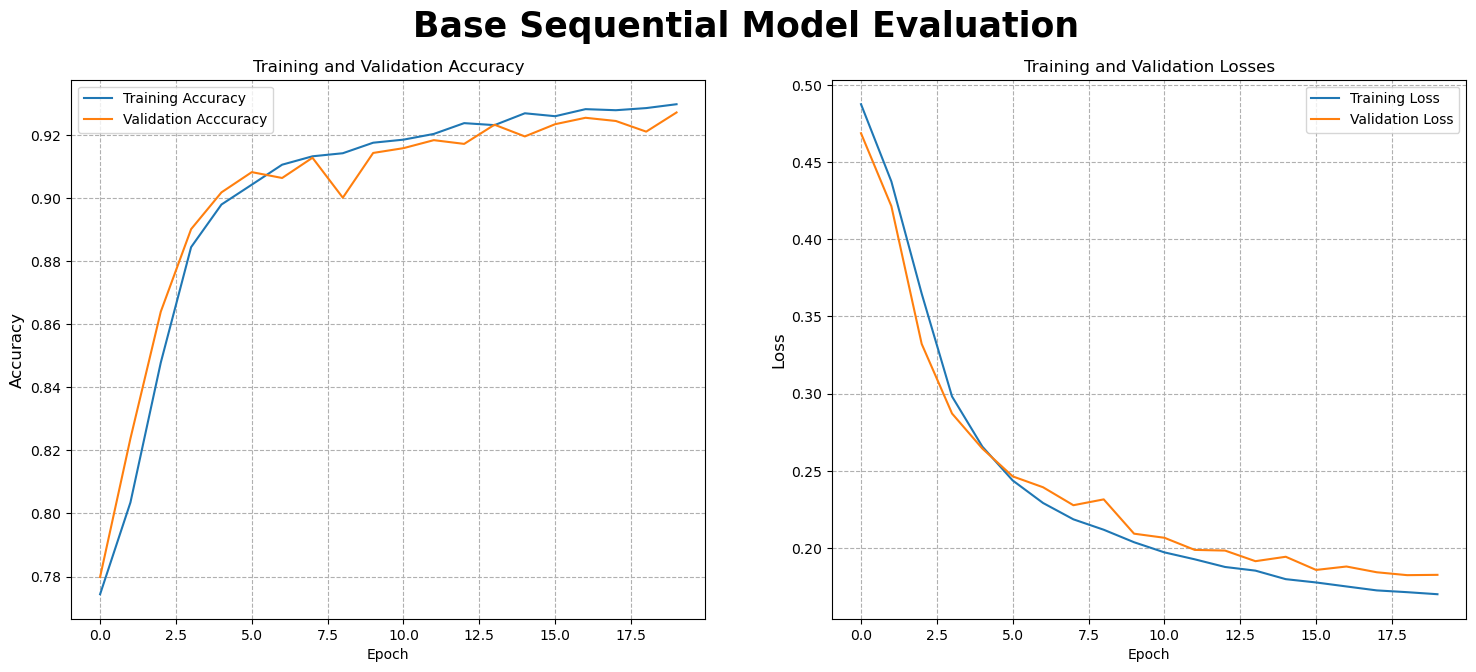

In [47]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Base Sequential Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_1.history['loss'], label="Training Loss")
plt.plot(history_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Our model still overfitting, but we don't have any gradient issues. So for the next model we will try to reduce the overfitting in our model.

### Sequential Model Improvement

In this section we will try to build more a slightly different model to improve our intial model.

#### Improved Model Definition

In [48]:
# Model Architecture & Definition
seq_model_tuned = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', kernel_initializer = 'HeNormal', kernel_regularizer='l2', input_shape=(inp,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

# Model Compiler
seq_model_tuned.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics ='accuracy')

Here we add some batch normalization and used an dropout neuron in hopes of achieving better performances, we also try to use different optimizer to reduce the overfit.

In [49]:
seq_model_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 215)               2365      
                                                                 
 batch_normalization_1 (Batc  (None, 215)              860       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 215)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

We have more trainable params in this tuned model.

#### Improved Model Training

Now we want to train our optimized model, in this case we use higher numbers of epochs but we will use early stopping. This method will allow us to stop the training when a minimum improvement in the validation loss is reached.

In [50]:
# Using early stop as callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train our model
history_2 = seq_model_tuned.fit(train_dataset, validation_data=(val_dataset), epochs = 50, callbacks = [early_stop])

Epoch 1/50
370/370 [==============================] - 3s 4ms/step - loss: 0.7079 - accuracy: 0.7435 - val_loss: 0.6243 - val_accuracy: 0.7734
Epoch 2/50
370/370 [==============================] - 1s 3ms/step - loss: 0.5702 - accuracy: 0.7872 - val_loss: 0.5184 - val_accuracy: 0.7924
Epoch 3/50
370/370 [==============================] - 1s 3ms/step - loss: 0.4706 - accuracy: 0.8213 - val_loss: 0.4088 - val_accuracy: 0.8488
Epoch 4/50
370/370 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8592 - val_loss: 0.3402 - val_accuracy: 0.8839
Epoch 5/50
370/370 [==============================] - 1s 3ms/step - loss: 0.3170 - accuracy: 0.8874 - val_loss: 0.2692 - val_accuracy: 0.9078
Epoch 6/50
370/370 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.9038 - val_loss: 0.2413 - val_accuracy: 0.9137
Epoch 7/50
370/370 [==============================] - 1s 3ms/step - loss: 0.2517 - accuracy: 0.9077 - val_loss: 0.2195 - val_accuracy: 0.9216
Epoch 

In this improved model, we use epoch of 24. Now we will vissualize our model.

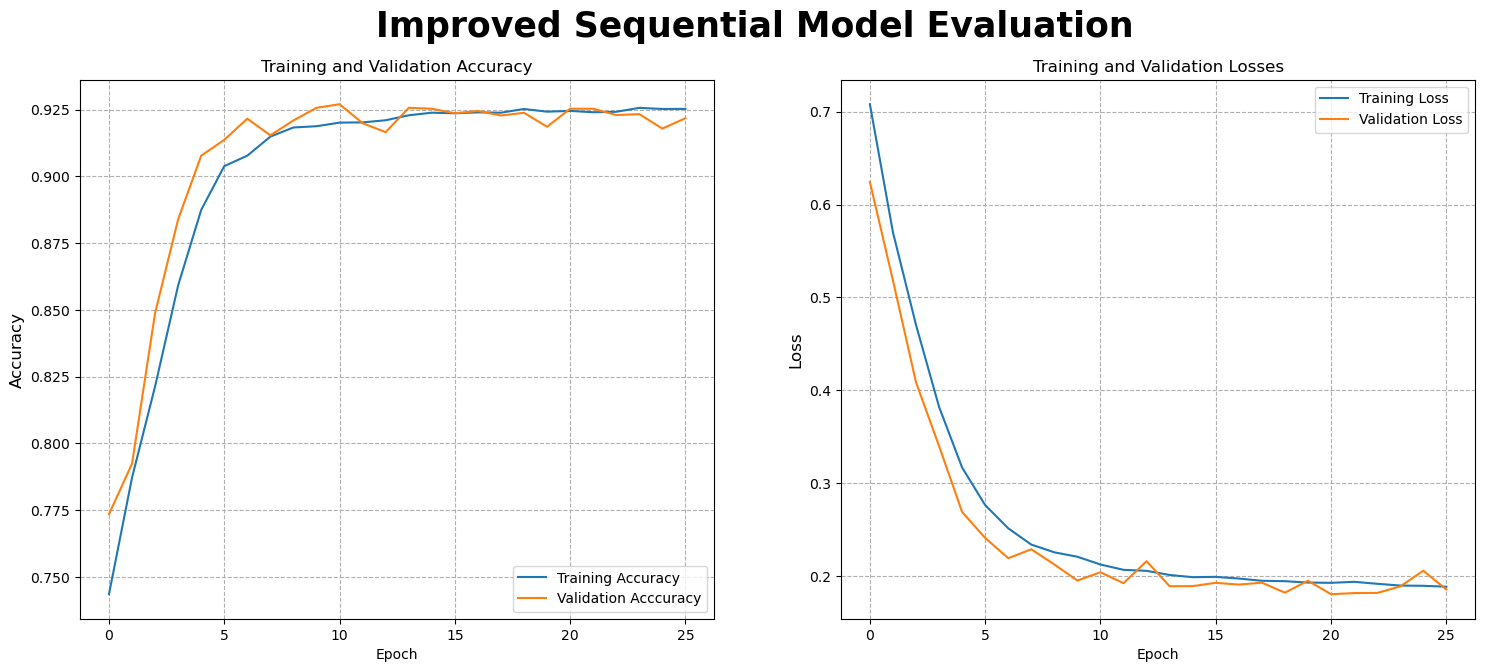

In [51]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Improved Sequential Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_2.history['loss'], label="Training Loss")
plt.plot(history_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Our result is looking better, since the overfiting has been reduced.

### Functional Model
Now we will make a different model using functional method.

#### Base Model Definition
Here is our base line model.

In [52]:
# Model Architecture
input_layer = tf.keras.layers.Input(shape=(X_train_tr.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='he_uniform')(input_layer)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

# Define Model
func_model_base = tf.keras.models.Model(inputs=input_layer,outputs=output)

# Model Complier
func_model_base.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [53]:
func_model_base.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 215)               2365      
                                                                 
 dense_8 (Dense)             (None, 1)                 216       
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________


We have 2,691 params to train, which is similar to our sequential baseline model.

#### Base Model Training
Now we train our model, with 20 epoch.

In [54]:
history_3 = func_model_base.fit(train_dataset, validation_data=(val_dataset), epochs = 20)

Epoch 1/20
370/370 [==============================] - 2s 3ms/step - loss: 0.5419 - accuracy: 0.7328 - val_loss: 0.4974 - val_accuracy: 0.7574
Epoch 2/20
370/370 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.7961 - val_loss: 0.3989 - val_accuracy: 0.8196
Epoch 3/20
370/370 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8621 - val_loss: 0.3262 - val_accuracy: 0.8711
Epoch 4/20
370/370 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.8799 - val_loss: 0.3020 - val_accuracy: 0.8777
Epoch 5/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.8863 - val_loss: 0.2894 - val_accuracy: 0.8816
Epoch 6/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.8898 - val_loss: 0.2767 - val_accuracy: 0.8836
Epoch 7/20
370/370 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.8956 - val_loss: 0.2646 - val_accuracy: 0.8910
Epoch 

We will see our result using this visualization below.

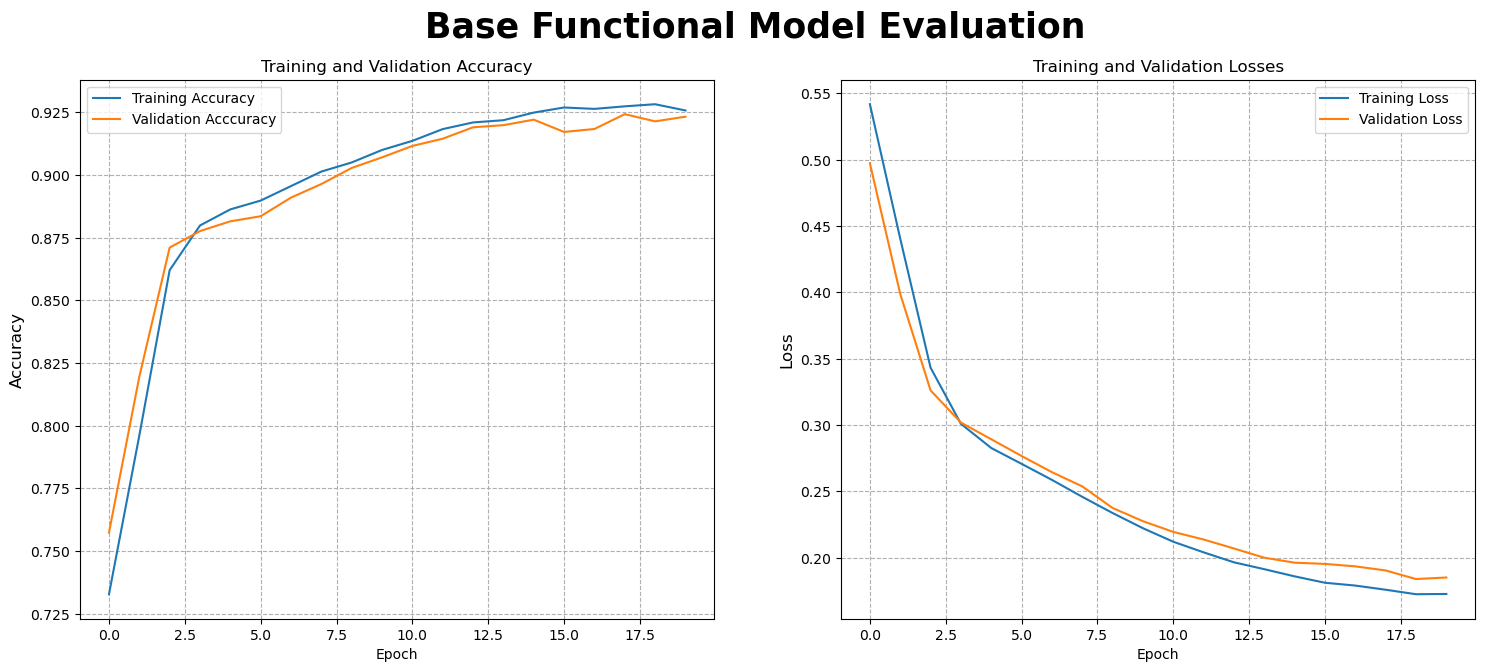

In [55]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Base Functional Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_3.history['accuracy'],label="Training Accuracy")
plt.plot(history_3.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_3.history['loss'], label="Training Loss")
plt.plot(history_3.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Our model sligthly overfiting in the end of the epoch, we will have to improve this too.

### Functional Model Improvement

Now we will build a different architecture for our new model.

#### Improved Model Definition

We decided to add batch normalization and dropout. Also we change the optimizer to RMSprop.

In [56]:
# Model Architecture
input_layer = tf.keras.layers.Input(shape=(X_train_tr.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal', kernel_regularizer='l2')(input_layer)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

# Define Model
func_model_tuned = tf.keras.models.Model(inputs=input_layer,outputs=output)

# Model Complier
func_model_tuned.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics='accuracy')

In [57]:
func_model_tuned.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 215)               2365      
                                                                 
 batch_normalization_3 (Batc  (None, 215)              860       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 215)               0   

From this summary, we have higher numbers of params to train.

#### Improved Model Training

In this training, we also add early stopping since we set our epoch higher.

In [58]:
# Using early stop as callback
early_stop = EarlyStopping(monitor='val_loss', patience=4)

history_4 = func_model_tuned.fit(train_dataset, validation_data=(val_dataset), epochs = 50, callbacks = [early_stop])

Epoch 1/50
370/370 [==============================] - 3s 4ms/step - loss: 0.6654 - accuracy: 0.7738 - val_loss: 0.5826 - val_accuracy: 0.8082
Epoch 2/50
370/370 [==============================] - 1s 3ms/step - loss: 0.4867 - accuracy: 0.8386 - val_loss: 0.4418 - val_accuracy: 0.8447
Epoch 3/50
370/370 [==============================] - 1s 3ms/step - loss: 0.3826 - accuracy: 0.8775 - val_loss: 0.3348 - val_accuracy: 0.9066
Epoch 4/50
370/370 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8925 - val_loss: 0.2776 - val_accuracy: 0.9116
Epoch 5/50
370/370 [==============================] - 1s 4ms/step - loss: 0.2861 - accuracy: 0.9053 - val_loss: 0.2553 - val_accuracy: 0.9201
Epoch 6/50
370/370 [==============================] - 1s 3ms/step - loss: 0.2633 - accuracy: 0.9102 - val_loss: 0.2343 - val_accuracy: 0.9194
Epoch 7/50
370/370 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.9129 - val_loss: 0.2227 - val_accuracy: 0.9218
Epoch 

We will find out our result more clearly using plots below.

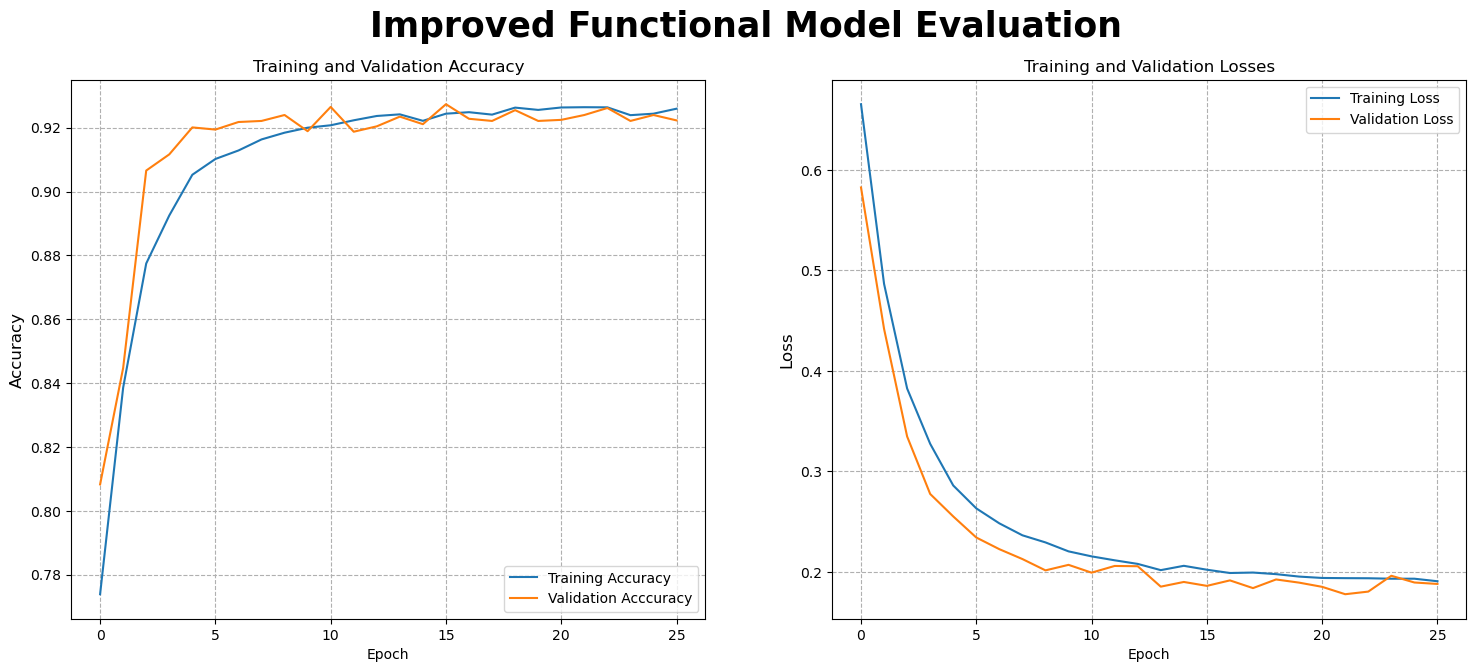

In [59]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
fig.suptitle('Improved Functional Model Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_4.history['accuracy'],label="Training Accuracy")
plt.plot(history_4.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_4.history['loss'], label="Training Loss")
plt.plot(history_4.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Here we can see that we successfully decrease the overfitting in the end of the epochs.

## Model Evaluation

In this section we will evaluate our model using some metrics, then we will choose the best one to be used in our inference model and deployment. We will focus on accuracy and AUC score from each of our model.

#### Base Sequential Evaluation

First we predict our test data using our model.

In [60]:
y_prob_seq_base = seq_model_base.predict(test_dataset)
y_pred_seq_base = np.round(y_prob_seq_base)

116/116 [==============================] - 0s 1ms/step


In [61]:
target_name = ['No','Yes']
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_seq_base, target_names=target_name))

============================== TEST ==============================
              precision    recall  f1-score   support

          No       0.90      0.95      0.92      3396
         Yes       0.95      0.91      0.93      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



Here we already have 93% accuracy, which is high.

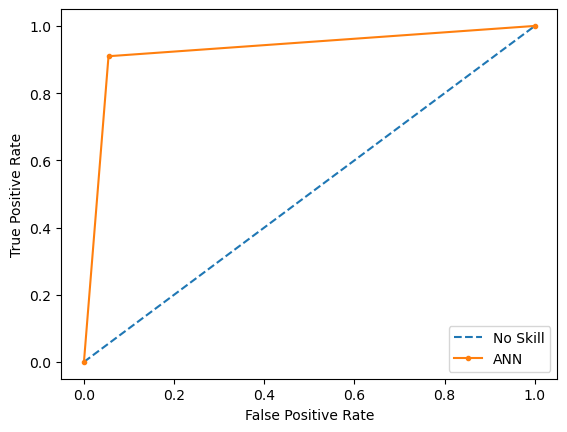

AUC: 0.9723288364115608


In [62]:
# Calculate rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq_base)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
# print roc-auc score
print('AUC:',roc_auc_score(y_test, y_prob_seq_base))

We also have a high AUC score of 97,23%

#### Improved Sequential Evaluation

Now we will look into our improved seq_model


In [63]:
y_prob_seq_tuned = seq_model_tuned.predict(test_dataset)
y_pred_seq_tuned = np.round(y_prob_seq_tuned)

116/116 [==============================] - 0s 2ms/step


In [64]:
target_name = ['No','Yes']
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_seq_tuned, target_names=target_name))

============================== TEST ==============================
              precision    recall  f1-score   support

          No       0.93      0.90      0.92      3396
         Yes       0.92      0.95      0.93      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



The accuracy doesn't seem to incrase here, but we see a more consistent number accross all the score.

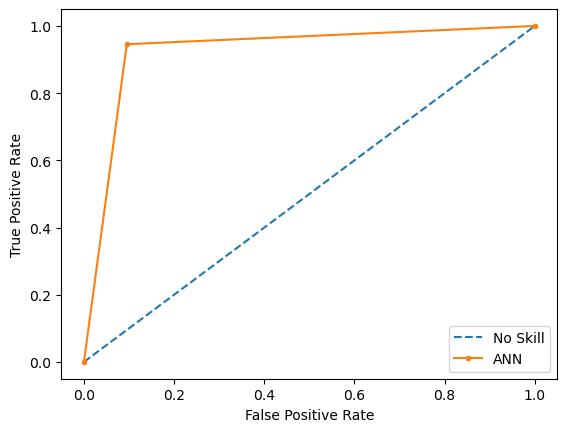

AUC: 0.9726370195851345


In [65]:
# Calculate rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq_tuned)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# print roc-auc score
print('AUC:',roc_auc_score(y_test, y_prob_seq_tuned))

The AUC score on improved model slightly increased, which means our improved model are slightly better. Also when we compare from the graph of loss_validation we see that the overfitting in this model is reduced, so we can say this model is goodfit.

#### Base Functional Evaluation

Now onto the functional model.

In [66]:
y_prob_func_base = func_model_base.predict(test_dataset)
y_pred_func_base = np.round(y_prob_func_base)

116/116 [==============================] - 0s 1ms/step


In [67]:
target_name = ['No','Yes']
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_func_base, target_names=target_name))

============================== TEST ==============================
              precision    recall  f1-score   support

          No       0.93      0.91      0.92      3396
         Yes       0.92      0.94      0.93      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.92      0.93      7399
weighted avg       0.93      0.93      0.93      7399



From this model, we also have a high number of accuracy with 93%

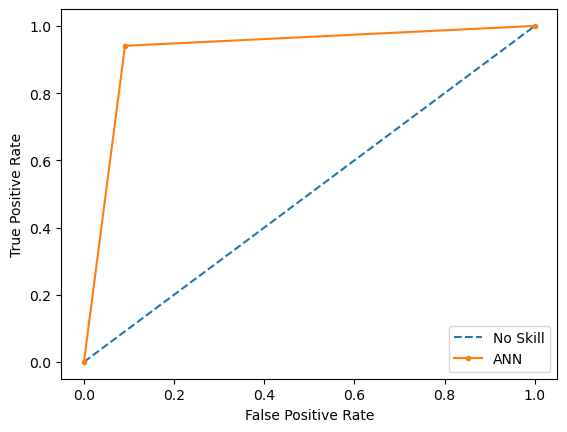

AUC: 0.9727038128353088


In [68]:
# Calculate rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func_base)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# print roc-auc score
print('AUC:',roc_auc_score(y_test, y_prob_func_base))

The AUC score is good too, or even higher than the rest of our model.

#### Improved Functional Evaluation

In [69]:
y_prob_func_tuned = func_model_tuned.predict(test_dataset)
y_pred_func_tuned = np.round(y_prob_func_tuned)

116/116 [==============================] - 0s 1ms/step


In [70]:
target_name = ['No','Yes']
print("="*30,"TEST","="*30)
print(classification_report(y_test, y_pred_func_tuned, target_names=target_name))

============================== TEST ==============================
              precision    recall  f1-score   support

          No       0.92      0.92      0.92      3396
         Yes       0.93      0.93      0.93      4003

    accuracy                           0.92      7399
   macro avg       0.92      0.92      0.92      7399
weighted avg       0.92      0.92      0.92      7399



Unfortunately, from our improve model the accuracy is slightly decrease. but the overall performace is better, and as we already see this model also decrease its overfitting issues. So this model still a goodfit eventhough it has a litle bit decrease in accuracy.

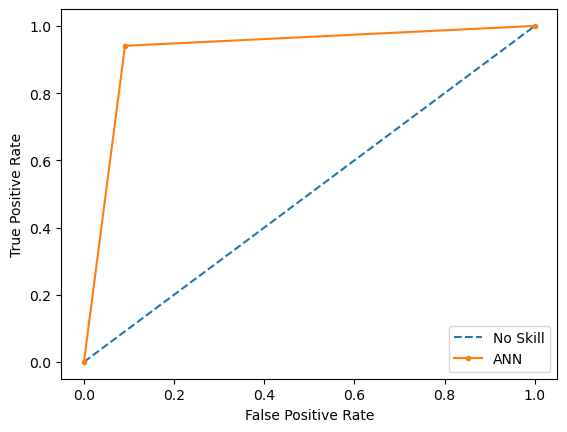

AUC: 0.9726270888706263


In [71]:
# Calculate rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func_base)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# print roc-auc score
print('AUC:',roc_auc_score(y_test, y_prob_func_tuned))

The AUC score is also good with 0.97

## Model Saving

We choose accuracy and AUC score because Accuracy can measure the percentage of correct predictions made by a model, and AUC score will measure the ability of a model to distinguish between positive (churned) and negative (not churned) cases. AUC score ranges from 0 to 1, where a value of 1 indicates a perfect classifier and a value of 0.5 indicates a random classifier.

After we evaluate our model using accuracy and AUC score we will choose the tuned sequential model as our final model. This is because this model is the most consistent and also the most goodfit model. 

In [72]:
#Saving our model
pickle.dump(preprocessing, open('pipeline_data.pkl','wb'))

seq_model_tuned.save('model.h5')

## Overall Analysis & Conclusion

From our model result, we can say that:
* Our model can be used to predict the churn rate in our company.
* From 4 model we try and use, the best model is the optimized sequential model. This is because the result looks like a goodfit and also do not have a gradient problem. Also the most consistent model from my personal judgement.
* The optimized sequential model has the accuracy of 93% and AUC score of 0.97 which is a good score.
* So using our model the company, from this result may predict the data with a good quality prediction which is good.
* In this model we use 10 features to predict our model, the features are: 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'days_since_last_login', 'avg_time_spent', 'feedback','membership_category', 'joined_through_referral', 'offer_application_preference', 'preferred_offer_types'.
* When we preparing our model, we use tensorflow pipeline to batch our data into 64 batch and also set the buffer size with the same amount of our train data.
* When doing improvement, we use different optimizer than our baseline model in hope to increase the model. This is decided after we try some combinations to decrease our overfiting model.
* We make our neutrons in our 4 models uniform, using rule of thumb for supervised learning problems [Nh=Ns/(α∗(Ni+No))]

From our intial EDA, we know that:
* We have some missing values and outliers in our data, we then do some preprocessing to make sure we handle those problems.
* We also try reduce cardinality in our feedback column, so we decided to decrease number of unique values from 9 to 3.
* The highest correlation with our target appeared on memberhsip category and feedback, we also add some feature into our model because we feel they have some correlations too, eventhough the score is not high.

Our model may need some further improvement, such as:
* Using different rule on using numbers of neuron in hidden layer.
* Using or adding different features.
* Handling imbalanced dataset, eventhough the inital data was not on extreme imbalanced but it may worth a try.
* Try some combination of optimizer or dropout value.
